### 1. Structure du dataset

L'arborescence des images dans PVF-10 est la suivante :

- PVF-10
    - Format 1
        - Train
            - Classe 1
            - Classe 2
            - ...
        - Test
            - Classe 1
            - Classe 2
            - ...
    - Format 2
        - Train
            - Classe 1
            - Classe 2
            - ...
        - Test
            - Classe 1
            - Classe 2
            - ...
    - ...

Récupérons cette structure **sous forme de dataframe** pour faciliter l'analyse

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

# Chemin du dataset
base_path = "../data/raw/PVF-10"

# On va créer un dataframe avec pour chaque image :
# - son chemin
chemin_img = []
# - son format déclaré
format_img = []
# - son ensemble train / test
train_test_img =[]
# - sa classe
classe_img =[]
# - son nom
nom_img = []
# - son type
type_img = []
# - sa largeur
largeur_img = []
# - sa hauteur
hauteur_img = []
# - son nb de canaux
canaux_img = []

# Pour chaque répertoire format
for format_folder_name in os.listdir(base_path):
    format_path = os.path.join(base_path,format_folder_name)
    # Pour chaque répertoire train/test
    for train_test_folder_name in os.listdir(format_path):
        train_test_path = os.path.join(format_path,train_test_folder_name)
        # Pour chaque répertoire classe
        for class_folder_name in os.listdir(train_test_path):
            class_path = os.path.join(train_test_path,class_folder_name)
            # Pour chaque image
            for img_filename in os.listdir(class_path):
                img_path = os.path.join(class_path,img_filename) # on récupère son chemin
                img_name,img_extension = os.path.splitext(img_filename) # on récupère son nom et son extension
                img = cv2.imread(img_path) # on charge l'image pour récupérer ses infos dimensionelles

                # Alimentation des colonnes du dataframe
                chemin_img.append(img_path)
                format_img.append(format_folder_name)
                train_test_img.append(train_test_folder_name)
                classe_img.append(class_folder_name)
                nom_img.append(img_name)
                type_img.append(img_extension)
                largeur_img.append(img.shape[1])
                hauteur_img.append(img.shape[0])
                canaux_img.append(img.shape[2])

df_pvf10 = pd.DataFrame(
    {
        "Chemin": chemin_img,
        "Format" : format_img,
        "Train_Test" : train_test_img,
        "Classe" : classe_img,
        "Nom" : nom_img,
        "Type" : type_img,
        "Largeur" : largeur_img,
        "Hauteur" : hauteur_img,
        "Canaux": canaux_img
    }
)

display(df_pvf10)


Chemin         Format  \
0      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  PVF_10_110x60   
1      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  PVF_10_110x60   
2      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  PVF_10_110x60   
3      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  PVF_10_110x60   
4      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  PVF_10_110x60   
...                                                  ...            ...   
16732  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     PVF_10_Ori   
16733  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     PVF_10_Ori   
16734  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     PVF_10_Ori   
16735  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     PVF_10_Ori   
16736  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     PVF_10_Ori   

      Train_Test                    Classe                               Nom  \
0           test  01substring open circuit  DJI_20230228122654_0466_T_000001   
1           test  01substring open circuit  DJI_20230228122803_0500_T_000001   
2           test  01substring open circuit  DJI_20230228123425_0666_T_000002   
3           test  01substring open circuit  DJI_20230228124402_0129_T_000002   
4           test  01substring open circuit  DJI_20230228124624_0220_T_000001   
...          ...                       ...                               ...   
16732      train           10healthy panel  DJI_20231121165445_0658_T_000004   
16733      train           10healthy panel  DJI_20231121165536_0682_T_000002   
16734      train           10healthy panel  DJI_20231121165610_0698_T_000002   
16735      train           10healthy panel  DJI_20231121165943_0012_T_000003   
16736      train           10healthy panel  DJI_20231121170238_0094_T_000002   

       Type  Largeur  Hauteur  Canaux  
0      .png       60      110       3  
1      .png       60      110       3  
2      .png       60      110       3  
3      .png       60      110       3  
4      .png       60      110       3  
...     ...      ...      ...     ...  
16732  .tif       69      109       3  
16733  .tif       65      110       3  
16734  .tif       63      109       3  
16735  .tif       70      116       3  
16736  .tif       68      108       3  

[16737 rows x 9 columns]

In [56]:
df_pvf10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chemin      16737 non-null  object
 1   Format      16737 non-null  object
 2   Train_Test  16737 non-null  object
 3   Classe      16737 non-null  object
 4   Nom         16737 non-null  object
 5   Type        16737 non-null  object
 6   Largeur     16737 non-null  int64 
 7   Hauteur     16737 non-null  int64 
 8   Canaux      16737 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


Nous avons réussi à lire les **16737 fichiers** du dataset pour charger leur image => **tous les fichiers sont valides**.

### 2. Cohérence des données : les formats d'images

Le dataframe a 16737 lignes soit 3x5579, ce qui correspondrait bien à la description faite par les créateurs du dataset : **5579 images dans 3 formats différents**
- original
- 110x60
- 112x112

Vérifions-le

In [57]:
print(df_pvf10['Format'].value_counts())

Format
PVF_10_110x60     5579
PVF_10_112x112    5579
PVF_10_Ori        5579
Name: count, dtype: int64


Le résultat est conforme. Pour plus de lisibilité, **supprimons le préfixe PVF_10_ du format** 

In [58]:
df_pvf10['Format'] = df_pvf10['Format'].str.removeprefix("PVF_10_")

Vérifions les types d'images pour chaque format

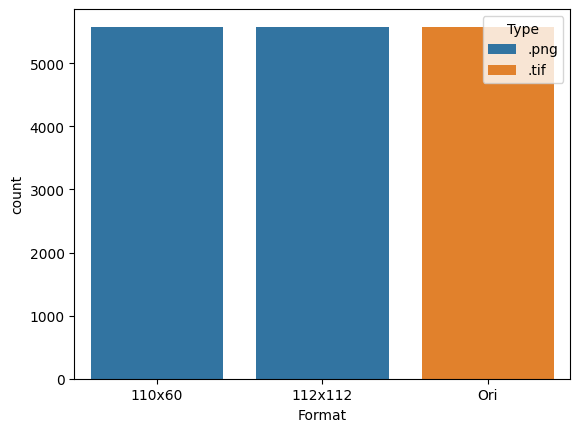

In [59]:
sns.countplot(data=df_pvf10,x='Format',hue='Type')
plt.show()

Le format original est donc constitué **exclusivement de type tif**. Les 2 autres formats sont constitués **exclusivement de type png**

Vérifions le nombre de canaux pour chaque format

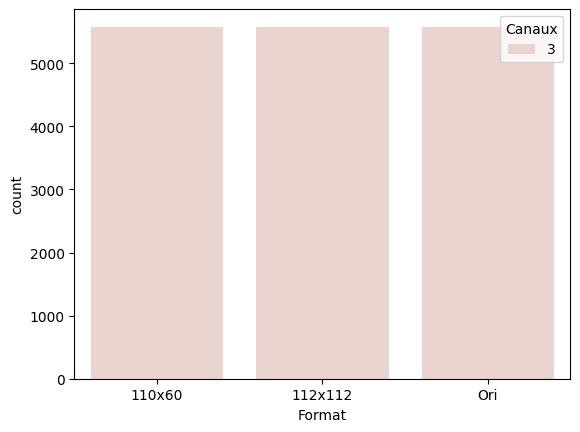

In [60]:
sns.countplot(data=df_pvf10,x='Format',hue='Canaux')
plt.show()

Toutes les images ont **3 canaux**. On pourra les afficher en couleur.

Vérifions que ce sont les mêmes images dans les trois formats différents

In [61]:
print ("Noms d'images différents par format :")
display(df_pvf10.groupby('Format')['Nom'].nunique())

# On récupère les nom de toutes les images au format 110 x 60
set_110_60 = set(df_pvf10.loc[df_pvf10['Format']=="110x60"]["Nom"].values)

# On récupère les nom de toutes les images au format 112 x 112
set_112_112 = set(df_pvf10.loc[df_pvf10['Format']=="112x112"]["Nom"].values)

# On récupère les nom de toutes les images au format original
set_ori = set(df_pvf10.loc[df_pvf10['Format']=="Ori"]["Nom"].values)

print ("S'agit-il des mêmes noms d'images dans les différents formats ? => ",set_110_60 == set_112_112 == set_ori)

Noms d'images différents par format :


Format
110x60     5579
112x112    5579
Ori        5579
Name: Nom, dtype: int64

S'agit-il des mêmes noms d'images dans les différents formats ? =>  True


**Chaque image apparaît donc bien 3 fois dans le dataset : une fois pour chaque format**

**Affichons** une même image prise au hasard dans les 3 formats.

Chemin   Format Train_Test  \
2112   ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...   110x60      train   
7688   ../data/raw/PVF-10\PVF_10_112x112\train\05hot ...  112x112      train   
13270  ../data/raw/PVF-10\PVF_10_Ori\train\05hot cell...      Ori      train   

           Classe                               Nom  Type  Largeur  Hauteur  \
2112   05hot cell  DJI_20230222130227_0261_T_000023  .png       60      110   
7688   05hot cell  DJI_20230222130227_0261_T_000023  .png      112      112   
13270  05hot cell  DJI_20230222130227_0261_T_000023  .tif       53       67   

       Canaux  
2112        3  
7688        3  
13270       3

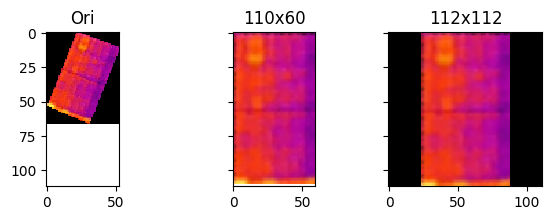

In [62]:
# Récupérer un nom d'image au hasard
nom_img_aleatoire = df_pvf10["Nom"].sample(n=1).iloc[0]

# Filtrer le dataframe sur ce nom d'image
df_img_aleatoire = df_pvf10.loc[df_pvf10["Nom"]==nom_img_aleatoire]
display(df_img_aleatoire)

# Création de la figure
fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharey=True)

# Ordre d'affichage des formats
formats_order = ["Ori", "110x60", "112x112"]

# Affichage de chaque image
for idx, format in enumerate(formats_order):
    img = cv2.imread(df_img_aleatoire.loc[df_img_aleatoire["Format"] == format]["Chemin"].squeeze())  # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    axes[idx].imshow(img, interpolation='none')
    axes[idx].set_title(format)

plt.show()


Vérifions la distribution des dimensions d'images dans les différents format. Commençons par le format original

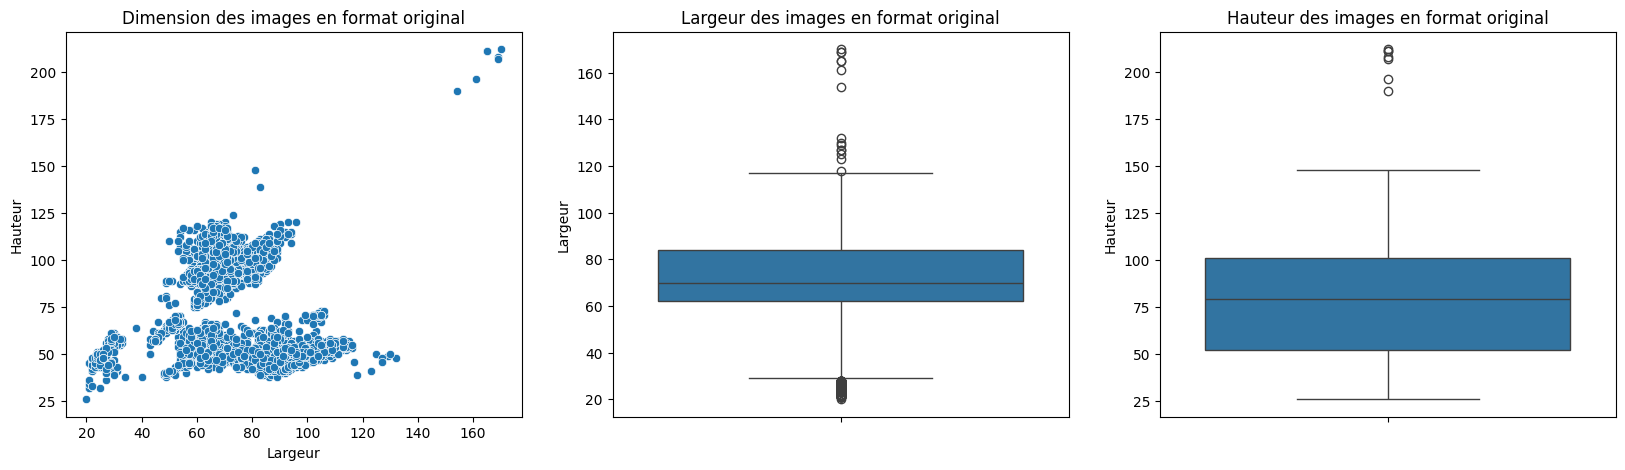

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.scatterplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], x="Largeur", y="Hauteur")
plt.title("Dimension des images en format original")
plt.subplot(132)
sns.boxplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], y="Largeur")
plt.title("Largeur des images en format original")
plt.subplot(133)
sns.boxplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], y="Hauteur")
plt.title("Hauteur des images en format original")
plt.show()

On est environ sur un **facteur 8 entre les plus petites images et les plus grandes dans le format original**.

Pas de valeurs aberrantes : on est entre 20 et 200 pixels, ce qui semble normal pour un panneau PV pris par un drone.

**Affichons les images ayant la plus petite largeur originale et leur conversion dans les 2 autres formats**

In [64]:
formats_order

['Ori', '110x60', '112x112']

LES PLUS PETITES IMAGES (en largeur) :


Chemin Format Train_Test  \
16388  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   
11641  ../data/raw/PVF-10\PVF_10_Ori\test\10healthy p...    Ori       test   
12018  ../data/raw/PVF-10\PVF_10_Ori\train\01bottom d...    Ori      train   
15081  ../data/raw/PVF-10\PVF_10_Ori\train\09substrin...    Ori      train   
16238  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

                         Classe                               Nom  Type  \
16388           10healthy panel  DJI_20230512123345_0384_T_000003  .tif   
11641           10healthy panel  DJI_20230308154214_0098_T_000012  .tif   
12018             01bottom dirt  DJI_20230512123345_0384_T_000004  .tif   
15081  09substring open circuit  DJI_20230512122847_0238_T_000004  .tif   
16238           10healthy panel  DJI_20230308150813_0013_T_000002  .tif   

       Largeur  Hauteur  Canaux  
16388       20       26       3  
11641       21       45       3  
12018       21       32       3  
15081       21       32       3  
16238       21       45       3

Image DJI_20230512123345_0384_T_000003 : taille originale 26x20


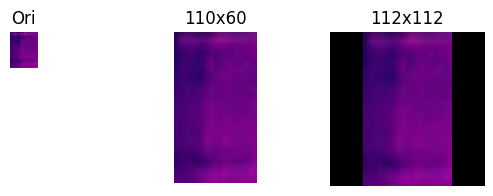

Image DJI_20230308154214_0098_T_000012 : taille originale 45x21


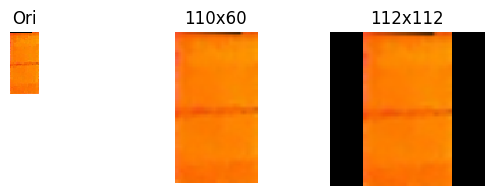

Image DJI_20230512123345_0384_T_000004 : taille originale 32x21


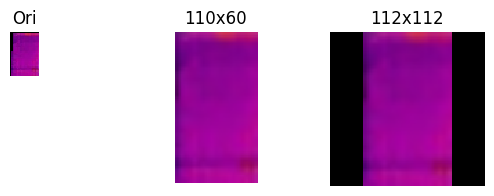

Image DJI_20230512122847_0238_T_000004 : taille originale 32x21


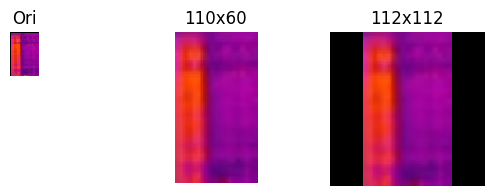

Image DJI_20230308150813_0013_T_000002 : taille originale 45x21


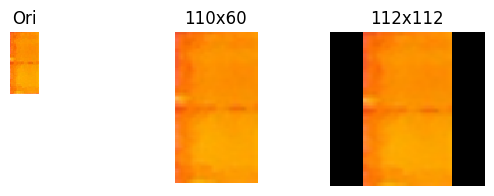

In [65]:
# Filtrer le dataframe sur les plus petites largeurs du format Ori
df_smallest_img = df_pvf10[df_pvf10["Format"]=="Ori"].nsmallest(5,"Largeur")
print("LES PLUS PETITES IMAGES (en largeur) :")
display(df_smallest_img)

# Ordre d'affichage des formats
formats_order = ["Ori", "110x60", "112x112"]

# Pour chacune de ces 5 petites images
for index,row in df_smallest_img.iterrows():
    print (f"Image {row["Nom"]} : taille originale {row["Hauteur"]}x{row["Largeur"]}")
    
    # Récupération des chemins et formats avec le même nom d'image (=> logiquement 3, 1 par format)
    chemins_formats = df_pvf10.loc[df_pvf10["Nom"]==row["Nom"],["Chemin","Format"]]
    
    # Application de l'ordre d'affichage des formats
    chemins_formats["Format"] = chemins_formats["Format"].astype("category").cat.set_categories(formats_order)
    chemins_formats = chemins_formats.sort_values(["Format"])
    
    # Création de la figure
    fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharey=True)

    idx = 0
    # Pour chaque chemin/format correspondant à cette image
    for tuple in chemins_formats.itertuples(index=False):
        img = cv2.imread(tuple.Chemin)  # Récupération de l'image en couleur
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        axes[idx].imshow(img, interpolation='none') # Affichage de l'image
        axes[idx].set_title(tuple.Format) # Titre  = format
        axes[idx].axis('off')
        idx += 1

    plt.show()



Concernant les petites images originales, celles-ci apparaissent moins pixelisées dans les 2 autres formats. Il y a donc eu une interpolation lors de leur agrandissement. 

Les motifs des petites images ont bien été conservés lors de la conversion.

**Affichons les images ayant la plus grande largeur originale et leur conversion dans les 2 autres formats**

LES PLUS GRANDES IMAGES (en largeur):


Chemin Format Train_Test  \
14410  ../data/raw/PVF-10\PVF_10_Ori\train\07short ci...    Ori      train   
11597  ../data/raw/PVF-10\PVF_10_Ori\test\10healthy p...    Ori       test   
15771  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   
14415  ../data/raw/PVF-10\PVF_10_Ori\train\07short ci...    Ori      train   
15738  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

                      Classe                               Nom  Type  Largeur  \
14410  07short circuit panel  DJI_20230223132111_0227_T_000001  .tif      170   
11597        10healthy panel  DJI_20230223130819_0183_T_000001  .tif      169   
15771        10healthy panel  DJI_20230223140105_0063_T_000003  .tif      169   
14415  07short circuit panel  DJI_20230223140105_0063_T_000001  .tif      165   
15738        10healthy panel  DJI_20230223130819_0183_T_000002  .tif      165   

       Hauteur  Canaux  
14410      212       3  
11597      208       3  
15771      207       3  
14415      211       3  
15738      211       3

Image DJI_20230223132111_0227_T_000001 : taille originale 212x170


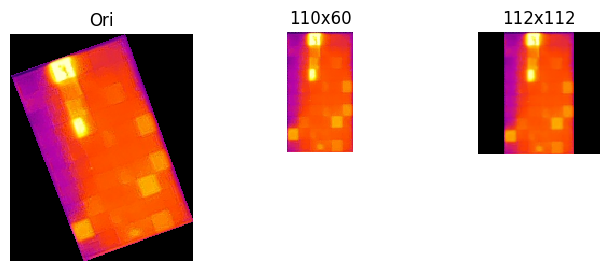

Image DJI_20230223130819_0183_T_000001 : taille originale 208x169


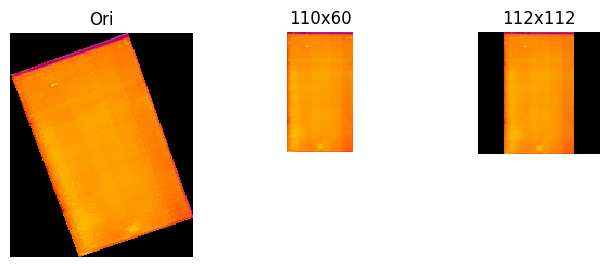

Image DJI_20230223140105_0063_T_000003 : taille originale 207x169


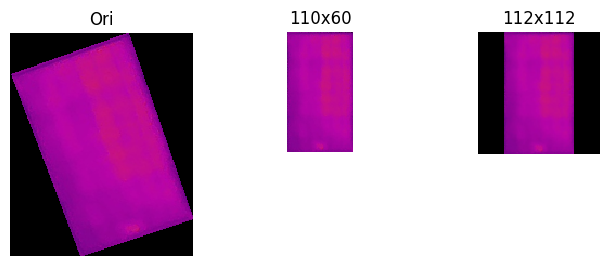

Image DJI_20230223140105_0063_T_000001 : taille originale 211x165


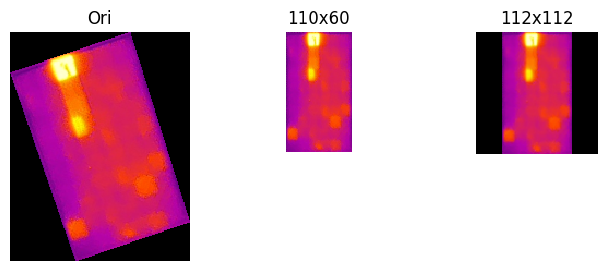

Image DJI_20230223130819_0183_T_000002 : taille originale 211x165


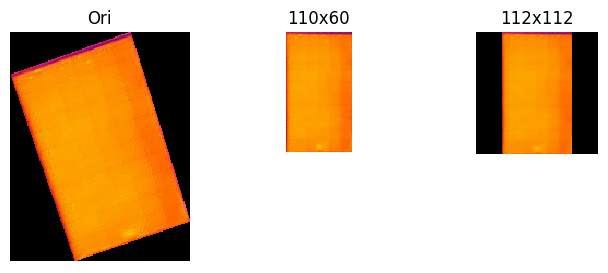

In [66]:
# Filtrer le dataframe sur les plus grandes largeurs du format Ori
df_largest_img = df_pvf10[df_pvf10["Format"]=="Ori"].nlargest(5,"Largeur")
print("LES PLUS GRANDES IMAGES (en largeur):")
display(df_largest_img)

# Ordre d'affichage des formats
formats_order = ["Ori", "110x60", "112x112"]

# Pour chacune de ces 5 grandes images
for index,row in df_largest_img.iterrows():
    print (f"Image {row["Nom"]} : taille originale {row["Hauteur"]}x{row["Largeur"]}")
    
    # Récupération des chemins et formats avec le même nom d'image (=> logiquement 3, 1 par format)
    chemins_formats = df_pvf10.loc[df_pvf10["Nom"]==row["Nom"],["Chemin","Format"]]
    
    # Application de l'ordre d'affichage des formats
    chemins_formats["Format"] = chemins_formats["Format"].astype("category").cat.set_categories(formats_order)
    chemins_formats = chemins_formats.sort_values(["Format"])
    
    # Création de la figure
    fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

    idx = 0
    # Pour chaque chemin/format correspondant à cette image
    for tuple in chemins_formats.itertuples(index=False):
        img = cv2.imread(tuple.Chemin)  # Récupération de l'image en couleur
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        axes[idx].imshow(img, interpolation='none') # Affichage de l'image
        axes[idx].set_title(tuple.Format) # Titre  = format
        # axes[idx].set_xlim(df_largest_img["Largeur"].max())
        axes[idx].set_ylim(df_largest_img["Hauteur"].max())
        axes[idx].axis('off')
        idx += 1

    plt.show()


Les motifs des grandes images originales ont bien été conservés lors de la conversion dans les 2 autres formats.

**Les images les plus petites comme les plus grandes du format original sont correctes dans les 3 formats**, pas d'aberration constatée 

Vérifions les dimensions d'images pour les formats indiqués 110x60 et 112x112. Logiquement on devrait trouver une unique valeur pour la largeur et la hauteur dans chaque format

In [67]:
print("Format 112x112")
print("Largeurs : ",df_pvf10[df_pvf10["Format"]=="112x112"]['Largeur'].unique())
print("Hauteurs : ",df_pvf10[df_pvf10["Format"]=="112x112"]['Hauteur'].unique())

print("\nFormat 110x60")
print("Largeurs : ",df_pvf10[df_pvf10["Format"]=="110x60"]['Largeur'].unique())
print("Hauteurs : ",df_pvf10[df_pvf10["Format"]=="110x60"]['Hauteur'].unique())


Format 112x112
Largeurs :  [112]
Hauteurs :  [112]

Format 110x60
Largeurs :  [60 62 59 61 63 65 58 57 64]
Hauteurs :  [110  61  60  57  55  63  59  62  56  58  64  53  54  52]


**Le format 112x112 ne contient que des images réellement de largeur 112 et de hauteur 112.**

En revanche, le format 110x60 indique plusieurs tailles d'images réelles. Visualisons la distribution des tailles d'images différentes de 110x60 dans ce format.

Pourcentage d'images au format 110x60 de taille différente de 110x60 : 4.19 %


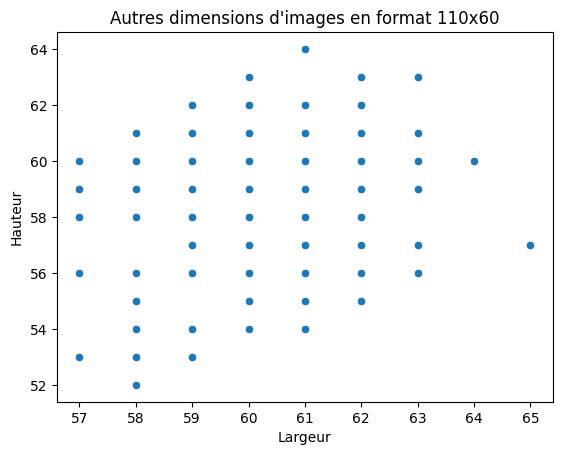

In [68]:
# Filtre sur le format 110x60
df_110x60 = df_pvf10.loc[df_pvf10["Format"]=="110x60"]
# Filtre sur le format 110x60 avec une hauteur ou une largeur différente de resp. 110 ou 60
df_110x60_anomaly = df_110x60.loc[(df_110x60["Hauteur"]!=110)|(df_110x60["Largeur"]!=60)]
print("Pourcentage d'images au format 110x60 de taille différente de 110x60 :",np.round(len(df_110x60_anomaly)/len(df_110x60) *100,2), "%")

# Affichage d'un nuage de points
sns.scatterplot(data=df_110x60_anomaly, x="Largeur", y="Hauteur")
plt.title("Autres dimensions d'images en format 110x60")
plt.show()

Nous avons donc **4% d'images plutôt carrées dans le format 110x60** (de dimension réelle autour de 60 x 60).

**Affichons**-en quelques-unes, avec leur correspondance dans le format original et 112x112

Chemin  Format Train_Test  \
5034  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5039  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5071  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
2644  ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...  110x60      train   
1167  ../data/raw/PVF-10\PVF_10_110x60\train\03Debri...  110x60      train   

               Classe                               Nom  Type  Largeur  \
5034  10healthy panel  DJI_20230302161112_0135_T_000008  .png       61   
5039  10healthy panel  DJI_20230302161225_0180_T_000002  .png       62   
5071  10healthy panel  DJI_20230302164928_0983_T_000011  .png       59   
2644       05hot cell  DJI_20230302160919_0064_T_000005  .png       58   
1167   03Debris cover  DJI_20230302163842_0787_T_000006  .png       63   

      Hauteur  Canaux  
5034       60       3  
5039       63       3  
5071       53       3  
2644       58       3  
1167       59       3

Image DJI_20230302161112_0135_T_000008 : taille originale 60x61


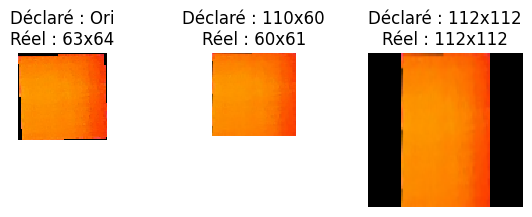

Image DJI_20230302161225_0180_T_000002 : taille originale 63x62


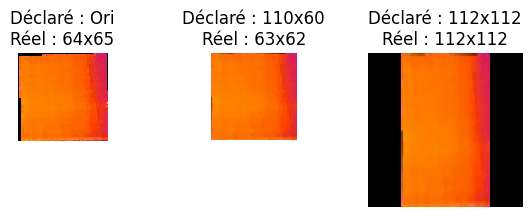

Image DJI_20230302164928_0983_T_000011 : taille originale 53x59


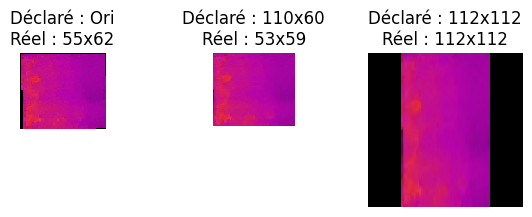

Image DJI_20230302160919_0064_T_000005 : taille originale 58x58


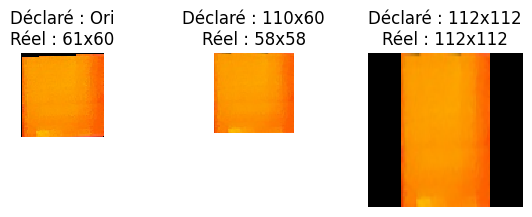

Image DJI_20230302163842_0787_T_000006 : taille originale 59x63


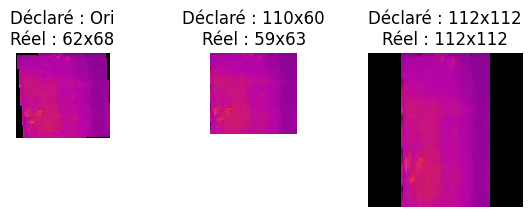

In [69]:
df_110x60_anomaly_5x = df_110x60_anomaly.sample(5)
display(df_110x60_anomaly_5x)

# Ordre d'affichage des formats
formats_order = ["Ori", "110x60", "112x112"]

# Pour chacune de ces 5 images
for index,row in df_110x60_anomaly_5x.iterrows():
    print (f"Image {row["Nom"]} : taille originale {row["Hauteur"]}x{row["Largeur"]}")
    
    # Récupération des chemins et formats avec le même nom d'image (=> logiquement 3, 1 par format)
    chemins_formats_largeurs_hauteurs = df_pvf10.loc[df_pvf10["Nom"]==row["Nom"],["Chemin","Format","Largeur","Hauteur"]].sort_values(by="Format",ascending=False)
    
    # Application de l'ordre d'affichage des formats
    chemins_formats_largeurs_hauteurs["Format"] = chemins_formats_largeurs_hauteurs["Format"].astype("category").cat.set_categories(formats_order)
    chemins_formats_largeurs_hauteurs = chemins_formats_largeurs_hauteurs.sort_values(["Format"])
    
    # Création de la figure
    fig, axes = plt.subplots(1, 3, figsize=(7, 2), sharey=True)

    idx = 0
    # Pour chaque chemin/format correspondant à cette image
    for tuple in chemins_formats_largeurs_hauteurs.itertuples(index=False):
        img = cv2.imread(tuple.Chemin)  # Récupération de l'image en couleur
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        axes[idx].imshow(img, interpolation='none') # Affichage de l'image
        axes[idx].set_title(f"Déclaré : {tuple.Format}\nRéel : {tuple.Hauteur}x{tuple.Largeur}") # Titre  = format
        axes[idx].axis('off')
        idx += 1

    plt.show()


Les images "carrées" dans le format 110x60 semblent être de dimension similaire dans le format original. Vérifions-le.



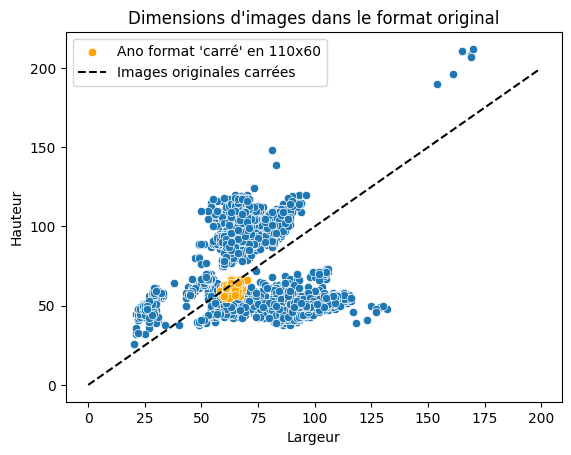

In [70]:
# On réaffiche les dimensions de toutes les images dans leur format original
sns.scatterplot(data=df_pvf10.loc[df_pvf10["Format"]=="Ori"], x="Largeur", y="Hauteur")
# Parmi ces images, on affiche en orange celles qui sont en anomalie dans le format 110x60 (carrées)
sns.scatterplot(data=df_pvf10.loc[(df_pvf10["Format"]=="Ori") & df_pvf10["Nom"].isin(df_110x60_anomaly["Nom"])], 
                x="Largeur", y="Hauteur",
                color="orange",label="Ano format 'carré' en 110x60")
# On trace la droite correspondant aux dimensions des images parfaitement carrées
plt.plot(np.arange(200),np.arange(200),"--",color="black",label="Images originales carrées")
plt.legend()
plt.title("Dimensions d'images dans le format original")
plt.show()


**Les images "plutôt carrées" du format 110x60 le sont aussi dans le format original, et de dimension équivalente.**
D'après les quelques visualisations effectuées, lors de la conversion de ces images originales vers le format 110x60 :
- il y a bien eu un recadrage, mais un "oubli" de resizing
- les motifs des images originales ont bien été conservés.

Nous allons annoter ces images dans les 3 formats car un doute subsiste quant à leur pertinence (d'autant que les panneaux photovoltaïques carrés sont rares). 

In [71]:
# On crée une colonne "Doute_Carre" dans le dataframe df_pvf10
df_pvf10["Doute_Carre"] = df_pvf10["Nom"].isin(df_110x60_anomaly["Nom"])

#### Conclusion sur la cohérence des formats d'images

Ce dataset est constitué de 16737 images IR. Précisément, il s'agit de **5579 images différentes, disponibles chacune dans 3 formats différents** :
- format original : images .tif en couleurs, d'une dimension approximative allant de 20x20 pixels à 200x200 pixels
- format 110x60 : images .png en couleurs. 96% de dimension 110x60, 4% plutôt carrées (dimension autour de 60x60)
- format 112x112 : images .png en couleurs, de dimension 112x112 pixels

Le seul point d'attention ici concerne les **4% d'images "carrées" du format 110x60**. D'après notre exploration, ces images semblent conformes aux images originales, mais le resizing a été omis. Nous devons garder en tête que pour la modélisation, il faudra soit redimensionner ces images en 110x60 soit les écarter.

### 3. Cohérence des données : les classes

Vérifions les différentes classes à notre disposition

In [72]:
print(f"{len(df_pvf10['Classe'].unique())} classes")
print(*df_pvf10['Classe'].unique(), sep =' | ')

19 classes
01substring open circuit | 02short circuit panel | 03string short circuit | 04Debris cover | 05shadow | 06bottom dirt | 07break | 08junction box heat | 09hot cell | 10healthy panel | 01bottom dirt | 02break | 03Debris cover | 04junction box heat | 05hot cell | 06shadow | 07short circuit panel | 08string short circuit | 09substring open circuit


La description du dataset indiquait 9 classes de défaut et une classe healthy panel. Or nous avons récupéré ici 18 classes de défaut et une classe healthy panel.

Visiblement ceci est dû au fait que les classes sont préfixées par 2 chiffres. Et cette numérotation n'a pas été faite dans le même ordre suivant les répertoires du dataset.

**Supprimons les 2 premiers chiffres** de la classe et vérifions cela.


In [73]:
df_pvf10['Classe'] = df_pvf10['Classe'].str[2:]
print(f"{len(df_pvf10['Classe'].unique())} classes")
print(*df_pvf10['Classe'].unique(), sep =' | ')

10 classes
substring open circuit | short circuit panel | string short circuit | Debris cover | shadow | bottom dirt | break | junction box heat | hot cell | healthy panel


Nous avons bien 10 classes conformément à la description : **9 classes de défauts et une classe healthy panel**

Vérifions maintenant que nous avons bien toutes les classes représentées de manière équilibrée

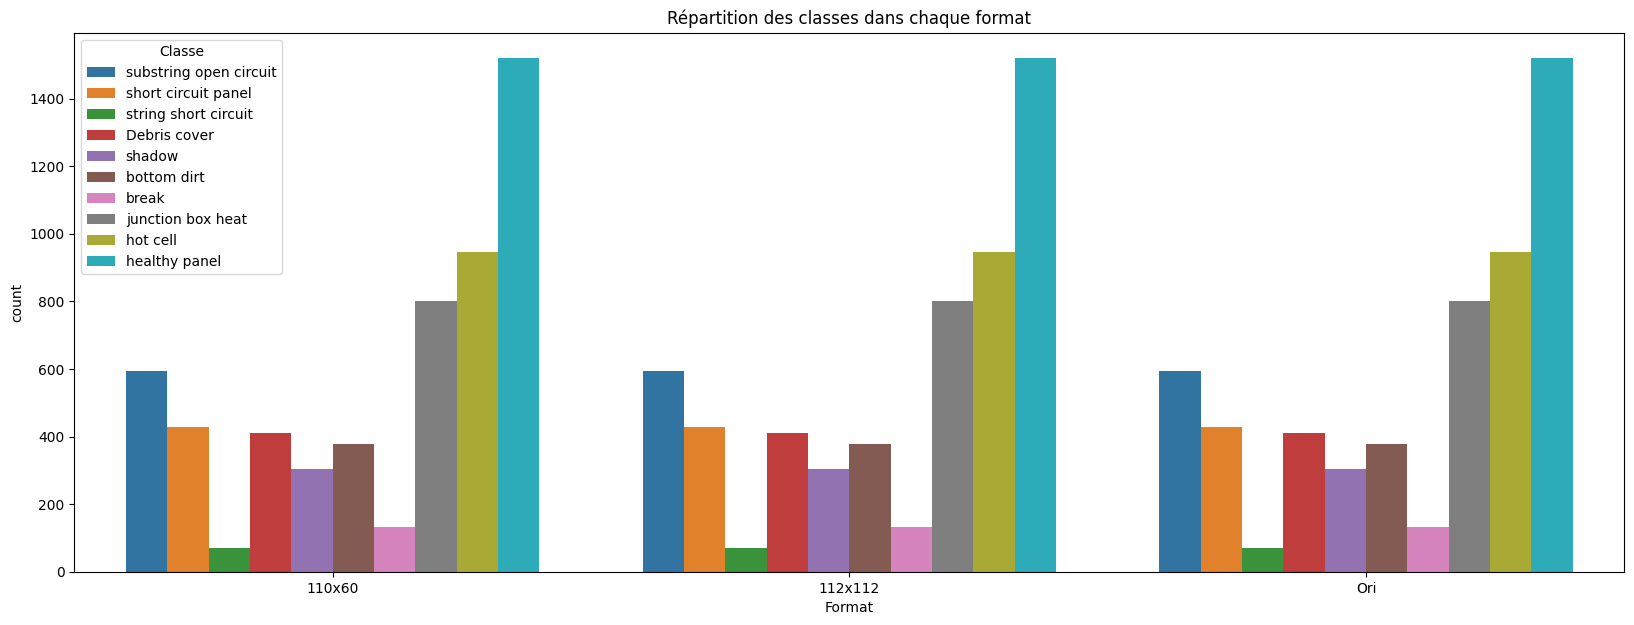

In [74]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_pvf10,x='Format',hue='Classe')
plt.title("Répartition des classes dans chaque format")
plt.show()

**Les classes sont plutôt équilibrées** : on prêtra attention toutefois attention aux classes *break* et *string short circuit* qui sont les moins représentées.

La classe *healthy panel* est plus représentée que les autres, mais de manière raisonnable.

La distribution est identique pour chaque format, ce qui est normal puisque ce sont les mêmes images qu'on retrouve d'un format à l'autre

Vérifions maintenant le **découpage en train / test** proposé dans le dataset

In [75]:
display(df_pvf10.groupby('Format')['Train_Test'].value_counts(normalize=True))

Format   Train_Test
110x60   train         0.900699
         test          0.099301
112x112  train         0.900699
         test          0.099301
Ori      train         0.900699
         test          0.099301
Name: proportion, dtype: float64

Les créateurs du dataset ont, pour chaque format, proposé un **échantillon de test correspondant à 10%** des images, ce qui est cohérent

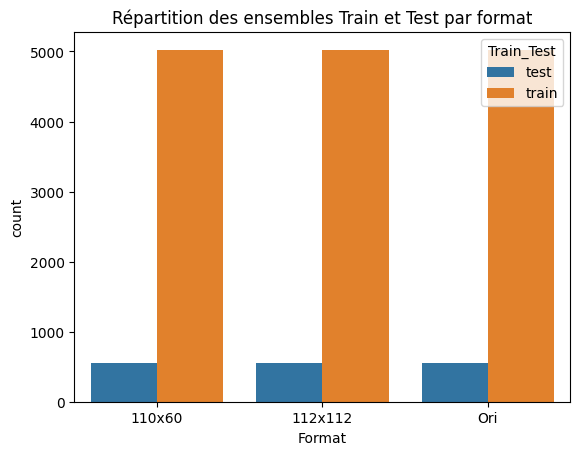

In [76]:
sns.countplot(data=df_pvf10,x='Format',hue='Train_Test')
plt.title("Répartition des ensembles Train et Test par format")
plt.show()

Vérifions que la répartition des classes est conservée entre ensemble train et test.

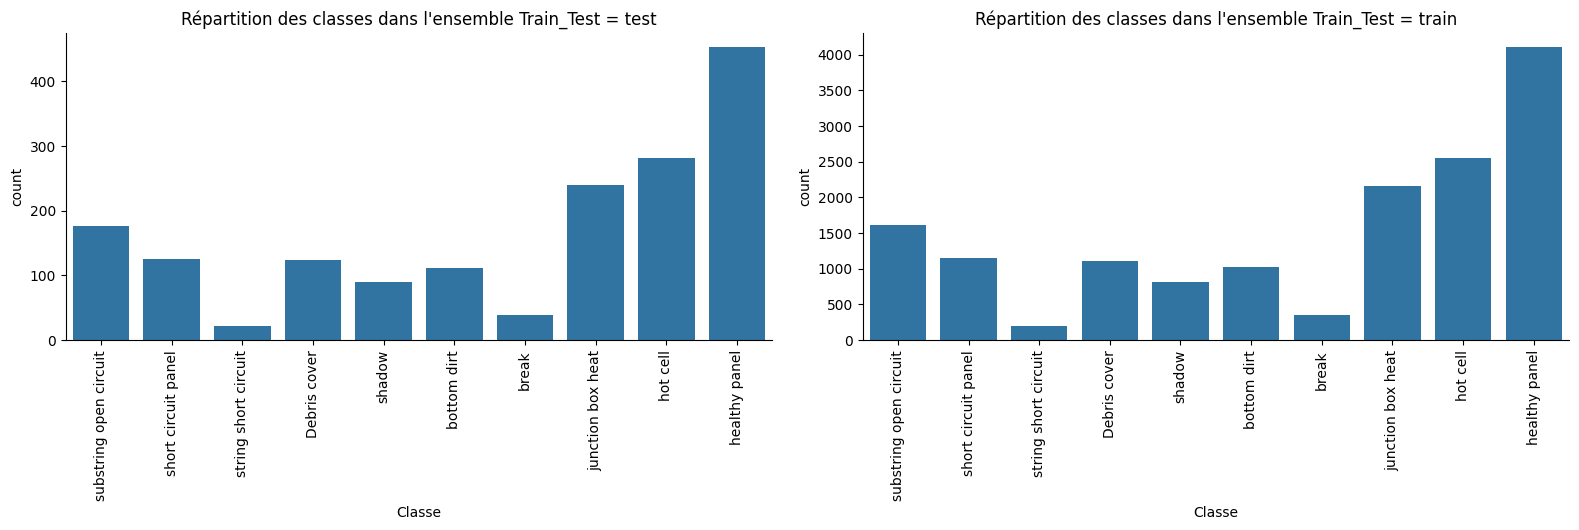

In [77]:
g = sns.FacetGrid(df_pvf10, col="Train_Test", sharey=False,height=4, aspect=2)
g.map(sns.countplot, "Classe", order=df_pvf10["Classe"].unique())

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(f"Répartition des classes dans l'ensemble {ax.get_title()}")
plt.show()


**La répartition des différentes classes est clairement conservée entre ensembles train et test**

Au hasard, **affichons une image de chaque classe** dans les 3 formats et les 2 sous-ensembles train et test

Echantillon de l'ensemble test du format 110x60


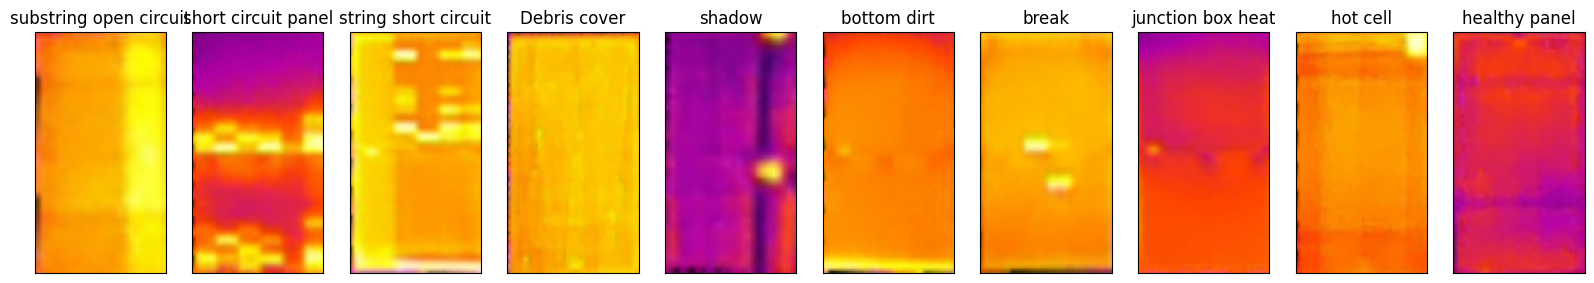

Echantillon de l'ensemble train du format 110x60


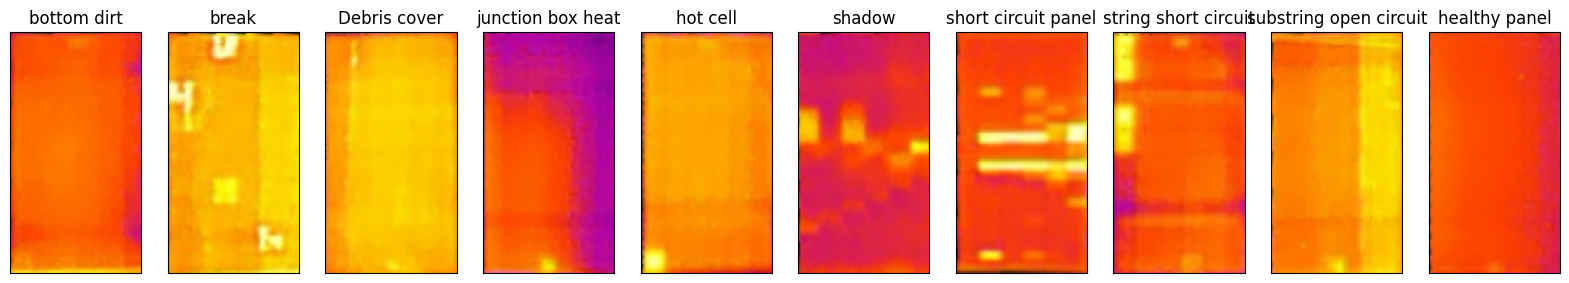

Echantillon de l'ensemble test du format 112x112


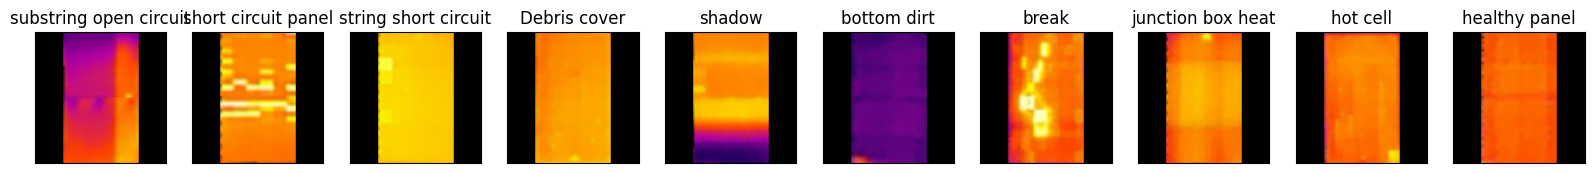

Echantillon de l'ensemble train du format 112x112


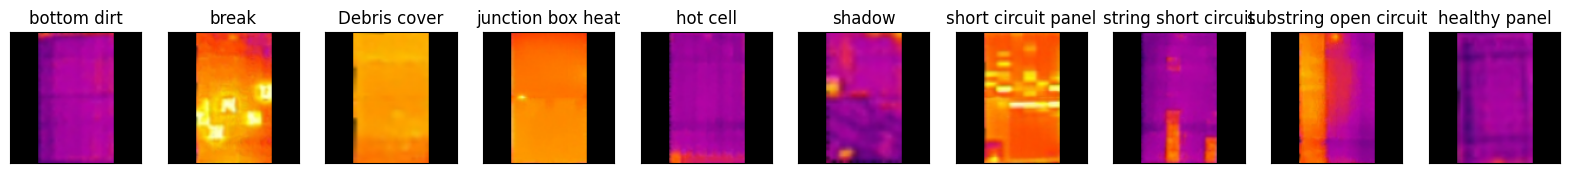

Echantillon de l'ensemble test du format Ori


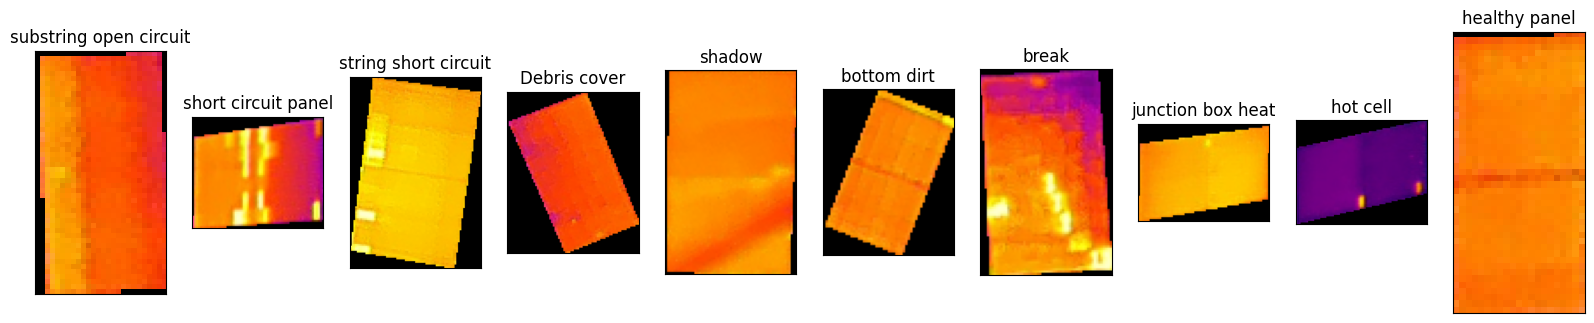

Echantillon de l'ensemble train du format Ori


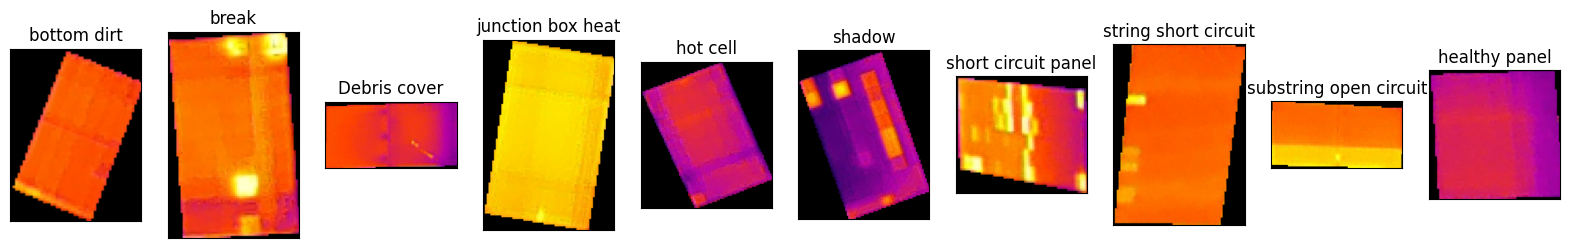

In [79]:
# Pour chaque format
for monFormat in df_pvf10['Format'].unique():
    # Pour chaque ensemble train_test
    for monEnsemble in df_pvf10['Train_Test'].unique():
        print (f"Echantillon de l'ensemble {monEnsemble} du format {monFormat}")
        # Filtrage du dataframe sur ce format et cet ensemble
        df_format_ensemble = df_pvf10.loc[(df_pvf10["Format"]==monFormat)&(df_pvf10["Train_Test"]==monEnsemble)]
        # Initialisation de la figure
        plt.figure(figsize=(20,7))
        num_plot=1
        # Pour chaque classe du dataframe filtré
        for classe in df_format_ensemble['Classe'].unique():
            classe_sample = df_format_ensemble.loc[(df_format_ensemble["Classe"]==classe)].sample(1).iloc[0] # Récupération d'une ligne au hasard pour cette classe  
            img = cv2.imread(classe_sample["Chemin"]) # Récupération de l'image en couleur
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
            plt.subplot(1,10,num_plot) # Positionnement sur le subplot
            plt.imshow(img) # Affichage de l'image
            plt.title(classe) # Titre  = classe
            plt.xticks([])
            plt.yticks([])
            num_plot += 1

        plt.show()


#### Conclusion sur la cohérence des classes

Le dataset proposé classe les images en 10 catégories : 
- une catégorie *healthy panel* représentant un peu plus d'un quart des observations
- 9 catégories de défauts pour le reste, réparties de manière plutôt équilibrée

Dans les étapes de modélisation, on prêtera toutefois attention aux classes *break* et *string short circuit* qui sont un peu moins représentées.


Les constructeurs du dataset ont également proposé un découpage entre ensemble d'entraînement (train) et de test :
- l'ensemble de test représente 10% environ des observations
- la répartition des classes est conservée entre ensembles train et test

Ce découpage train / test est donc conforme aux standards de l'apprentissage supervisé, mais rien ne nous empêche d'en choisir un différent au moment de la modélisation.

### 4. Doublons et 'valeurs manquantes'

Commençons par vérifier qu'il n'y a pas d'images strictement identiques entre elles.

In [80]:
import hashlib

# Dictionnaire des hash MD5 : clé = hash, valeur = indice de l'image
hashes = {}
# Dictionnaire des doublons : clé = hash, valeur = indices des images en doublon
duplicates = {}

# Pour chaque fichier répertorié
for index,chemin in df_pvf10["Chemin"].items():
    # Calcul du hash MD5
    with open(chemin, "rb") as f:
        file_hash = hashlib.md5(f.read()).hexdigest()
    # Si le hash est déjà présent dans le dico, on a un doublon 
    if file_hash in hashes:
        # Renseigner l'indice de l'image initiale dans duplicates
        if file_hash not in duplicates:
            duplicates[file_hash] = []
            duplicates[file_hash].append(hashes[file_hash])
        # Renseigner l'indice de l'image en doublon dans duplicates
        duplicates[file_hash].append(index)
    # Sinon, on ajoute au dico le hash avec l'indice de l'image associée
    else:
        hashes[file_hash] = index

print(f"Nombre de doublons : {len(duplicates)}\n")


Nombre de doublons : 21



Affichons les lignes du dataframe correspondant à ces doublons.

In [83]:
duplicates_indexes = [idx for idxs in duplicates.values() for idx in idxs]
display(df_pvf10.loc[duplicates_indexes][["Nom", "Format", "Train_Test", "Classe", "Largeur", "Hauteur"]])

Nom   Format Train_Test  \
2482   DJI_20230227163409_0290_T_000001   110x60      train   
2484   DJI_20230227163409_0290_T_000005   110x60      train   
2483   DJI_20230227163409_0290_T_000002   110x60      train   
2485   DJI_20230227163409_0290_T_000006   110x60      train   
3694   DJI_20230228123317_0638_T_000001   110x60      train   
3695   DJI_20230228123317_0638_T_000004   110x60      train   
448    DJI_20230227163409_0290_T_000008   110x60       test   
4729   DJI_20230227163409_0290_T_000004   110x60      train   
4728   DJI_20230227163409_0290_T_000003   110x60      train   
4730   DJI_20230227163409_0290_T_000007   110x60      train   
4779   DJI_20230228123317_0638_T_000002   110x60      train   
4781   DJI_20230228123317_0638_T_000005   110x60      train   
4780   DJI_20230228123317_0638_T_000003   110x60      train   
4782   DJI_20230228123317_0638_T_000006   110x60      train   
8057   DJI_20230227163409_0290_T_000001  112x112      train   
8059   DJI_20230227163409_0290_T_000005  112x112      train   
8058   DJI_20230227163409_0290_T_000002  112x112      train   
8060   DJI_20230227163409_0290_T_000006  112x112      train   
5580   DJI_20230228123317_0638_T_000001  112x112       test   
9274   DJI_20230228123317_0638_T_000004  112x112      train   
10297  DJI_20230227163409_0290_T_000003  112x112      train   
10299  DJI_20230227163409_0290_T_000007  112x112      train   
10298  DJI_20230227163409_0290_T_000004  112x112      train   
10300  DJI_20230227163409_0290_T_000008  112x112      train   
10349  DJI_20230228123317_0638_T_000002  112x112      train   
10350  DJI_20230228123317_0638_T_000005  112x112      train   
6042   DJI_20230228123317_0638_T_000003  112x112       test   
10351  DJI_20230228123317_0638_T_000006  112x112      train   
13640  DJI_20230227163409_0290_T_000001      Ori      train   
13642  DJI_20230227163409_0290_T_000005      Ori      train   
13641  DJI_20230227163409_0290_T_000002      Ori      train   
13643  DJI_20230227163409_0290_T_000006      Ori      train   
14852  DJI_20230228123317_0638_T_000001      Ori      train   
14853  DJI_20230228123317_0638_T_000004      Ori      train   
11606  DJI_20230227163409_0290_T_000008      Ori       test   
15887  DJI_20230227163409_0290_T_000004      Ori      train   
15886  DJI_20230227163409_0290_T_000003      Ori      train   
15888  DJI_20230227163409_0290_T_000007      Ori      train   
15937  DJI_20230228123317_0638_T_000002      Ori      train   
15939  DJI_20230228123317_0638_T_000005      Ori      train   
15938  DJI_20230228123317_0638_T_000003      Ori      train   
15940  DJI_20230228123317_0638_T_000006      Ori      train   

                       Classe  Largeur  Hauteur  
2482                 hot cell       60      110  
2484                 hot cell       60      110  
2483                 hot cell       60      110  
2485                 hot cell       60      110  
3694   substring open circuit       60      110  
3695   substring open circuit       60      110  
448             healthy panel       60      110  
4729            healthy panel       60      110  
4728            healthy panel       60      110  
4730            healthy panel       60      110  
4779            healthy panel       60      110  
4781            healthy panel       60      110  
4780            healthy panel       60      110  
4782            healthy panel       60      110  
8057                 hot cell      112      112  
8059                 hot cell      112      112  
8058                 hot cell      112      112  
8060                 hot cell      112      112  
5580   substring open circuit      112      112  
9274   substring open circuit      112      112  
10297           healthy panel      112      112  
10299           healthy panel      112      112  
10298           healthy panel      112      112  
10300           healthy panel      112      112  
10349           healthy panel      112      112  
10350           healthy pa

Nous avons détecté **21 images dupliquées**. Affichons-les

Doublon 1 :


Chemin  Format Train_Test  \
2482  ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...  110x60      train   
2484  ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...  110x60      train   

        Classe                               Nom  Type  Largeur  Hauteur  \
2482  hot cell  DJI_20230227163409_0290_T_000001  .png       60      110   
2484  hot cell  DJI_20230227163409_0290_T_000005  .png       60      110   

      Canaux  Doute_Carre  
2482       3        False  
2484       3        False

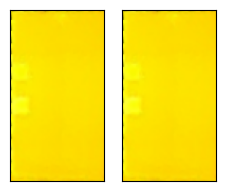

Doublon 2 :


Chemin  Format Train_Test  \
2483  ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...  110x60      train   
2485  ../data/raw/PVF-10\PVF_10_110x60\train\05hot c...  110x60      train   

        Classe                               Nom  Type  Largeur  Hauteur  \
2483  hot cell  DJI_20230227163409_0290_T_000002  .png       60      110   
2485  hot cell  DJI_20230227163409_0290_T_000006  .png       60      110   

      Canaux  Doute_Carre  
2483       3        False  
2485       3        False

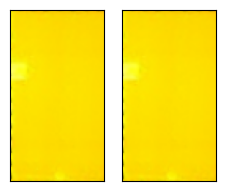

Doublon 3 :


Chemin  Format Train_Test  \
3694  ../data/raw/PVF-10\PVF_10_110x60\train\09subst...  110x60      train   
3695  ../data/raw/PVF-10\PVF_10_110x60\train\09subst...  110x60      train   

                      Classe                               Nom  Type  Largeur  \
3694  substring open circuit  DJI_20230228123317_0638_T_000001  .png       60   
3695  substring open circuit  DJI_20230228123317_0638_T_000004  .png       60   

      Hauteur  Canaux  Doute_Carre  
3694      110       3        False  
3695      110       3        False

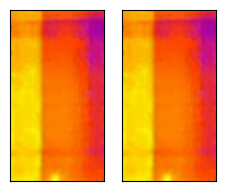

Doublon 4 :


Chemin  Format Train_Test  \
448   ../data/raw/PVF-10\PVF_10_110x60\test\10health...  110x60       test   
4729  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   

             Classe                               Nom  Type  Largeur  Hauteur  \
448   healthy panel  DJI_20230227163409_0290_T_000008  .png       60      110   
4729  healthy panel  DJI_20230227163409_0290_T_000004  .png       60      110   

      Canaux  Doute_Carre  
448        3        False  
4729       3        False

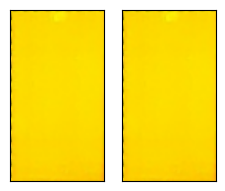

Doublon 5 :


Chemin  Format Train_Test  \
4728  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
4730  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   

             Classe                               Nom  Type  Largeur  Hauteur  \
4728  healthy panel  DJI_20230227163409_0290_T_000003  .png       60      110   
4730  healthy panel  DJI_20230227163409_0290_T_000007  .png       60      110   

      Canaux  Doute_Carre  
4728       3        False  
4730       3        False

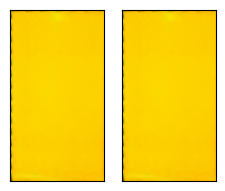

Doublon 6 :


Chemin  Format Train_Test  \
4779  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
4781  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   

             Classe                               Nom  Type  Largeur  Hauteur  \
4779  healthy panel  DJI_20230228123317_0638_T_000002  .png       60      110   
4781  healthy panel  DJI_20230228123317_0638_T_000005  .png       60      110   

      Canaux  Doute_Carre  
4779       3        False  
4781       3        False

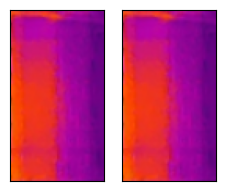

Doublon 7 :


Chemin  Format Train_Test  \
4780  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
4782  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   

             Classe                               Nom  Type  Largeur  Hauteur  \
4780  healthy panel  DJI_20230228123317_0638_T_000003  .png       60      110   
4782  healthy panel  DJI_20230228123317_0638_T_000006  .png       60      110   

      Canaux  Doute_Carre  
4780       3        False  
4782       3        False

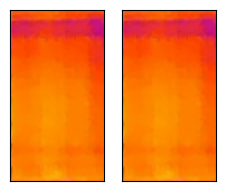

Doublon 8 :


Chemin   Format Train_Test  \
8057  ../data/raw/PVF-10\PVF_10_112x112\train\05hot ...  112x112      train   
8059  ../data/raw/PVF-10\PVF_10_112x112\train\05hot ...  112x112      train   

        Classe                               Nom  Type  Largeur  Hauteur  \
8057  hot cell  DJI_20230227163409_0290_T_000001  .png      112      112   
8059  hot cell  DJI_20230227163409_0290_T_000005  .png      112      112   

      Canaux  Doute_Carre  
8057       3        False  
8059       3        False

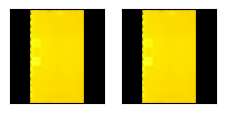

Doublon 9 :


Chemin   Format Train_Test  \
8058  ../data/raw/PVF-10\PVF_10_112x112\train\05hot ...  112x112      train   
8060  ../data/raw/PVF-10\PVF_10_112x112\train\05hot ...  112x112      train   

        Classe                               Nom  Type  Largeur  Hauteur  \
8058  hot cell  DJI_20230227163409_0290_T_000002  .png      112      112   
8060  hot cell  DJI_20230227163409_0290_T_000006  .png      112      112   

      Canaux  Doute_Carre  
8058       3        False  
8060       3        False

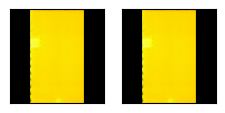

Doublon 10 :


Chemin   Format Train_Test  \
5580  ../data/raw/PVF-10\PVF_10_112x112\test\01subst...  112x112       test   
9274  ../data/raw/PVF-10\PVF_10_112x112\train\09subs...  112x112      train   

                      Classe                               Nom  Type  Largeur  \
5580  substring open circuit  DJI_20230228123317_0638_T_000001  .png      112   
9274  substring open circuit  DJI_20230228123317_0638_T_000004  .png      112   

      Hauteur  Canaux  Doute_Carre  
5580      112       3        False  
9274      112       3        False

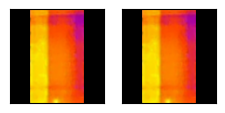

Doublon 11 :


Chemin   Format Train_Test  \
10297  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   
10299  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   

              Classe                               Nom  Type  Largeur  \
10297  healthy panel  DJI_20230227163409_0290_T_000003  .png      112   
10299  healthy panel  DJI_20230227163409_0290_T_000007  .png      112   

       Hauteur  Canaux  Doute_Carre  
10297      112       3        False  
10299      112       3        False

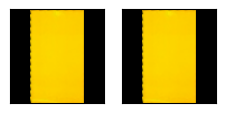

Doublon 12 :


Chemin   Format Train_Test  \
10298  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   
10300  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   

              Classe                               Nom  Type  Largeur  \
10298  healthy panel  DJI_20230227163409_0290_T_000004  .png      112   
10300  healthy panel  DJI_20230227163409_0290_T_000008  .png      112   

       Hauteur  Canaux  Doute_Carre  
10298      112       3        False  
10300      112       3        False

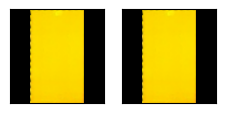

Doublon 13 :


Chemin   Format Train_Test  \
10349  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   
10350  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   

              Classe                               Nom  Type  Largeur  \
10349  healthy panel  DJI_20230228123317_0638_T_000002  .png      112   
10350  healthy panel  DJI_20230228123317_0638_T_000005  .png      112   

       Hauteur  Canaux  Doute_Carre  
10349      112       3        False  
10350      112       3        False

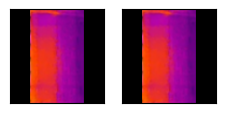

Doublon 14 :


Chemin   Format Train_Test  \
6042   ../data/raw/PVF-10\PVF_10_112x112\test\10healt...  112x112       test   
10351  ../data/raw/PVF-10\PVF_10_112x112\train\10heal...  112x112      train   

              Classe                               Nom  Type  Largeur  \
6042   healthy panel  DJI_20230228123317_0638_T_000003  .png      112   
10351  healthy panel  DJI_20230228123317_0638_T_000006  .png      112   

       Hauteur  Canaux  Doute_Carre  
6042       112       3        False  
10351      112       3        False

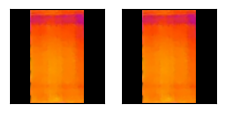

Doublon 15 :


Chemin Format Train_Test  \
13640  ../data/raw/PVF-10\PVF_10_Ori\train\05hot cell...    Ori      train   
13642  ../data/raw/PVF-10\PVF_10_Ori\train\05hot cell...    Ori      train   

         Classe                               Nom  Type  Largeur  Hauteur  \
13640  hot cell  DJI_20230227163409_0290_T_000001  .tif       71      104   
13642  hot cell  DJI_20230227163409_0290_T_000005  .tif       71      104   

       Canaux  Doute_Carre  
13640       3        False  
13642       3        False

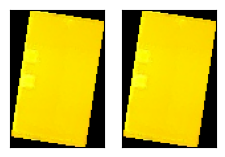

Doublon 16 :


Chemin Format Train_Test  \
13641  ../data/raw/PVF-10\PVF_10_Ori\train\05hot cell...    Ori      train   
13643  ../data/raw/PVF-10\PVF_10_Ori\train\05hot cell...    Ori      train   

         Classe                               Nom  Type  Largeur  Hauteur  \
13641  hot cell  DJI_20230227163409_0290_T_000002  .tif       68      101   
13643  hot cell  DJI_20230227163409_0290_T_000006  .tif       68      101   

       Canaux  Doute_Carre  
13641       3        False  
13643       3        False

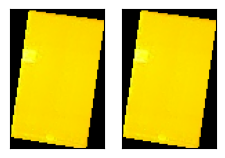

Doublon 17 :


Chemin Format Train_Test  \
14852  ../data/raw/PVF-10\PVF_10_Ori\train\09substrin...    Ori      train   
14853  ../data/raw/PVF-10\PVF_10_Ori\train\09substrin...    Ori      train   

                       Classe                               Nom  Type  \
14852  substring open circuit  DJI_20230228123317_0638_T_000001  .tif   
14853  substring open circuit  DJI_20230228123317_0638_T_000004  .tif   

       Largeur  Hauteur  Canaux  Doute_Carre  
14852       61       92       3        False  
14853       61       92       3        False

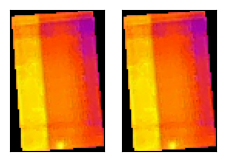

Doublon 18 :


Chemin Format Train_Test  \
11606  ../data/raw/PVF-10\PVF_10_Ori\test\10healthy p...    Ori       test   
15887  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

              Classe                               Nom  Type  Largeur  \
11606  healthy panel  DJI_20230227163409_0290_T_000008  .tif       70   
15887  healthy panel  DJI_20230227163409_0290_T_000004  .tif       70   

       Hauteur  Canaux  Doute_Carre  
11606      103       3        False  
15887      103       3        False

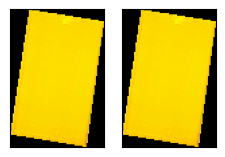

Doublon 19 :


Chemin Format Train_Test  \
15886  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   
15888  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

              Classe                               Nom  Type  Largeur  \
15886  healthy panel  DJI_20230227163409_0290_T_000003  .tif       69   
15888  healthy panel  DJI_20230227163409_0290_T_000007  .tif       69   

       Hauteur  Canaux  Doute_Carre  
15886       96       3        False  
15888       96       3        False

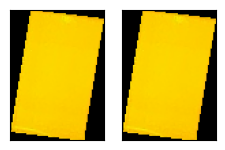

Doublon 20 :


Chemin Format Train_Test  \
15937  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   
15939  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

              Classe                               Nom  Type  Largeur  \
15937  healthy panel  DJI_20230228123317_0638_T_000002  .tif       60   
15939  healthy panel  DJI_20230228123317_0638_T_000005  .tif       60   

       Hauteur  Canaux  Doute_Carre  
15937       94       3        False  
15939       94       3        False

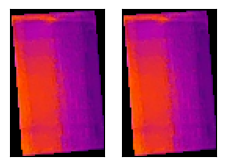

Doublon 21 :


Chemin Format Train_Test  \
15938  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   
15940  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...    Ori      train   

              Classe                               Nom  Type  Largeur  \
15938  healthy panel  DJI_20230228123317_0638_T_000003  .tif       61   
15940  healthy panel  DJI_20230228123317_0638_T_000006  .tif       61   

       Hauteur  Canaux  Doute_Carre  
15938       94       3        False  
15940       94       3        False

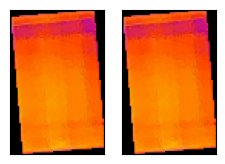

In [84]:
idx_img_doublons =[]
# Pour chaque doublon
for idx_doublon,doublon in enumerate(duplicates.values()):
    print(f"Doublon {idx_doublon+1} :")
    # On affiche les informations des images en doublon
    display(df_pvf10.loc[doublon])
    # On affiche les images
    plt.figure(figsize=(7,5))
    for i,idx_img in enumerate(doublon):
        idx_img_doublons.append(idx_img) # Alimentation liste des images en doublon
        plt.subplot(1,5,i+1)
        img = cv2.imread(df_pvf10.loc[idx_img,"Chemin"]) # Récupération de l'image en couleur
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        plt.imshow(img) # Affichage de l'image
        plt.xticks([])
        plt.yticks([])
    plt.show()

Visiblement, pour ces 21 doublons, il s'agit de **7 doublons du format d'origine, qui sont logiquement devenus des doublons lors de leur conversion vers les 2 autres formats.** Vérifions-le. 

In [85]:
# On vérifie que la même image est en doublon dans les 3 formats
display(df_pvf10.loc[idx_img_doublons,"Nom"].value_counts())


Nom
DJI_20230227163409_0290_T_000001    3
DJI_20230227163409_0290_T_000005    3
DJI_20230227163409_0290_T_000002    3
DJI_20230227163409_0290_T_000006    3
DJI_20230228123317_0638_T_000001    3
DJI_20230228123317_0638_T_000004    3
DJI_20230227163409_0290_T_000008    3
DJI_20230227163409_0290_T_000004    3
DJI_20230227163409_0290_T_000003    3
DJI_20230227163409_0290_T_000007    3
DJI_20230228123317_0638_T_000002    3
DJI_20230228123317_0638_T_000005    3
DJI_20230228123317_0638_T_000003    3
DJI_20230228123317_0638_T_000006    3
Name: count, dtype: int64

Les doublons concernent bien les mêmes images dans les 3 formats différents

**Supprimons les doublons** du dataframe

In [86]:
# Pour chaque doublon
for doublon in duplicates.values():
    # Si c'est un doublon du format original (choix arbitraire)
    if df_pvf10.loc[doublon[0],'Format']=="Ori":
        # On choisit arbitrairement la première image du doublon
        nom_img_a_supprimer = df_pvf10.loc[doublon[0],'Nom']
        # On supprime l'image dans les 3 formats
        df_pvf10 = df_pvf10.loc[df_pvf10['Nom']!=nom_img_a_supprimer]

On vérifie qu'on a maintenant 5572 images par format au lieu de 5579

In [87]:
# On vérifie qu'on a maintenant 5572 images par format au lieu de 5579
print ("Noms d'images différents par format :")
display(df_pvf10.groupby('Format')['Nom'].nunique())

Noms d'images différents par format :


Format
110x60     5572
112x112    5572
Ori        5572
Name: Nom, dtype: int64

Vérifions qu'il n'y a **pas d'image vide ou très "sombre"** (moyenne RGB très basse)

In [88]:
images_na = []
# Pour chaque image répertoriée
for chemin in df_pvf10["Chemin"]:
    img = cv2.imread(chemin) # Récupération de l'image en couleurs
    if img is None or np.mean(img) < 10 :  # Vérifie si l'image est trop sombre
            images_na.append(img_name)

print(f"Nombre d'images 'manquantes' : {len(images_na)}")

Nombre d'images 'manquantes' : 0


#### Conclusion sur les doublons et images manquantes

Le dataset ne présente pas d'images manquantes, au sens vides ou très sombres.

En revanche, il y a dans chaque format 7 images en doublon. Nous les avons supprimées du dataframe

### 5. Analyse des images : les couleurs

Commençons par analyser la **proportion de noir** dans les images

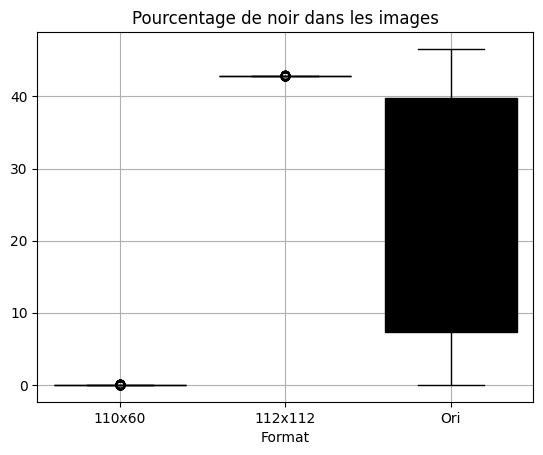

In [89]:
# Fonction qui renvoie la proportion de pixels noirs dans une image RGB
def proportion_noir_rgb(image, seuil=10):
    # Définition d'un pixel noir : R, G et B < seuil
    noir_pixels = np.sum((image[:,:,0] < seuil) & (image[:,:,1] < seuil) & (image[:,:,2] < seuil))
    # Nb de pixels de l'image
    total_pixels = img.shape[0] * img.shape[1]
    # On revoie le rapport
    return noir_pixels / total_pixels

# On calcule la proportion de noir dans chaque image du dataset
proportions_noir_rgb = []
# Pour chaque format
for chemin in df_pvf10["Chemin"]:
    img = cv2.imread(chemin) # Récupération de l'image en couleurs
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# Conversion RGB
    proportions_noir_rgb.append(proportion_noir_rgb(img))

# On affiche ces proportions dans un boxplot par format
sns.boxplot(x=df_pvf10['Format'],y=100*np.array(proportions_noir_rgb),color="black")
plt.title("Pourcentage de noir dans les images")
plt.grid(True)
plt.show()



Les résultats sont conformes aux attentes : 
- *Format original* : on a entre 0 et 50% de noir dans toutes les images. Le noir correspond à tout ce qui est en dehors du panneau dans l'image (panneau capturé dans sa perspective par rapport à l'image rectangulaire)
- *Format 110x60* : il n'y a pas de noir. C'est normal, ces images ont été construites par découpage du panneau dans l'image original
- *Format 112x112* : il y a un peu plus de 40% de noir. Ces images ont en effet été construites en remplissant les images 110x60 de noir pour obtenir un format carré

Dans la suite de cette analyse, nous allons nous intéresser aux images des panneaux en tant que tels, donc nous allons **travailler uniquement sur le format 110x60**

In [90]:
df_110x60 = df_pvf10.loc[df_pvf10["Format"]=="110x60"]


**Affichons, pour une image aléatoire de chaque classe, l'ensemble des pixels dans l'espace RGB**

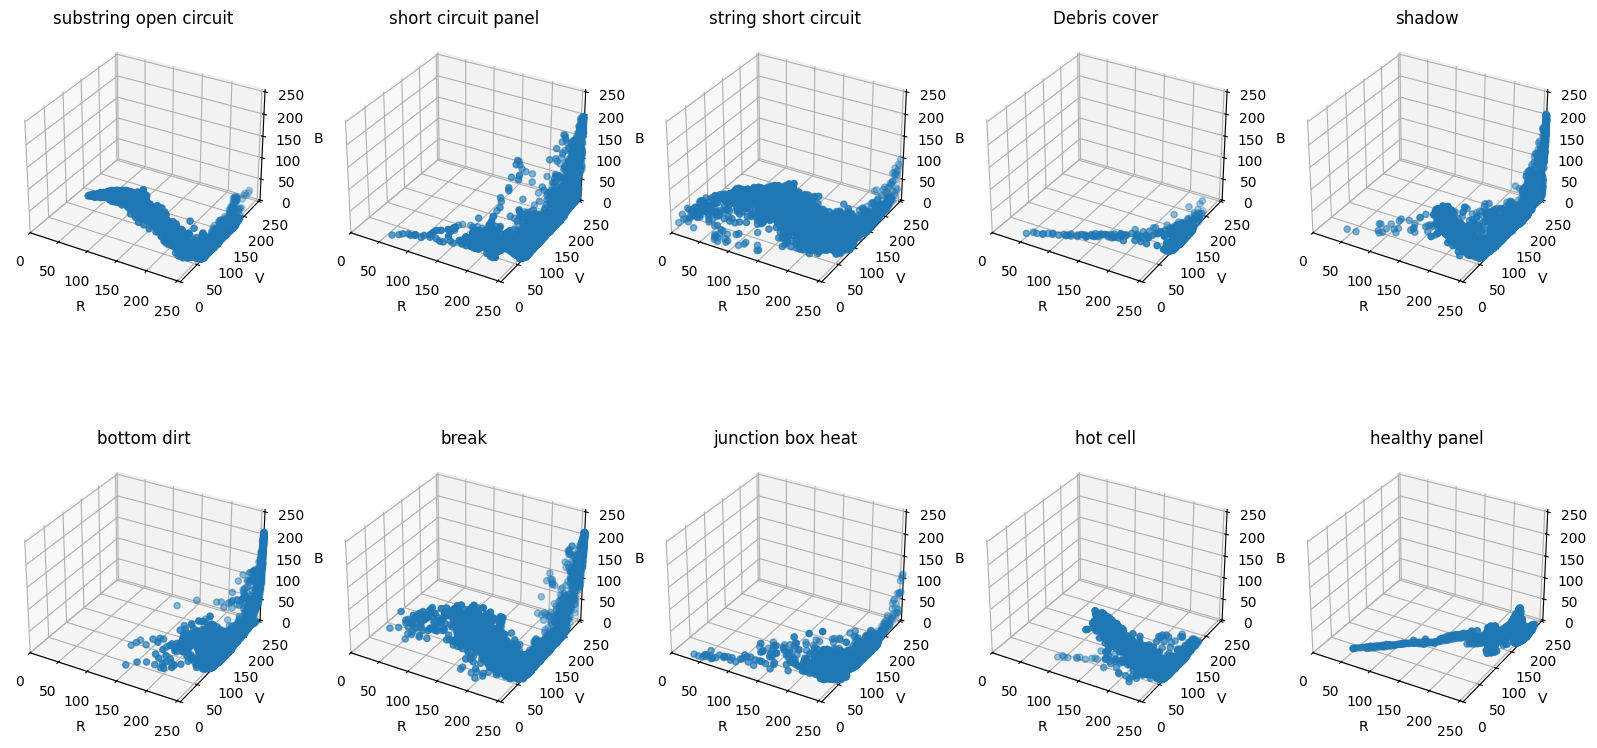

In [91]:

# Initialisation de la figure
fig = plt.figure(figsize=(20,10))
num_plot=1
# Pour chaque classe
for classe in df_110x60['Classe'].unique():
    classe_sample = df_110x60.loc[(df_110x60["Classe"]==classe)].sample(1).iloc[0] # Récupération d'une ligne au hasard pour cette classe  
    img = cv2.imread(classe_sample["Chemin"]) # Récupération de l'image en couleur
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
    red_canal = img[:,:,0].flatten() # Récupération du canal rouge
    green_canal = img[:,:,1].flatten() # Récupération du canal vert
    blue_canal = img[:,:,2].flatten() # Récupération du canal bleu
    # On affiche un nuage de points en 3D des 3 canaux de l'image
    ax = fig.add_subplot(2,5,num_plot,projection='3d')
    ax.scatter(red_canal,green_canal,blue_canal)
    ax.set_xlabel('R')
    ax.set_ylabel('V')
    ax.set_zlabel('B')
    ax.set_xlim([0,255])
    ax.set_ylim([0,255])
    ax.set_zlim([0,255])
    ax.set_title(classe)
    num_plot += 1

plt.show()

L'échantillon récupéré semble indiquer que pour tous les types de défaut, les images tirent vers le rouge (tassage du nuage de points à droite) et ont peu de bleu (tassage du nuage de points en bas).

Vérifions la **moyenne des canaux R/V/B sur l'ensemble des images**

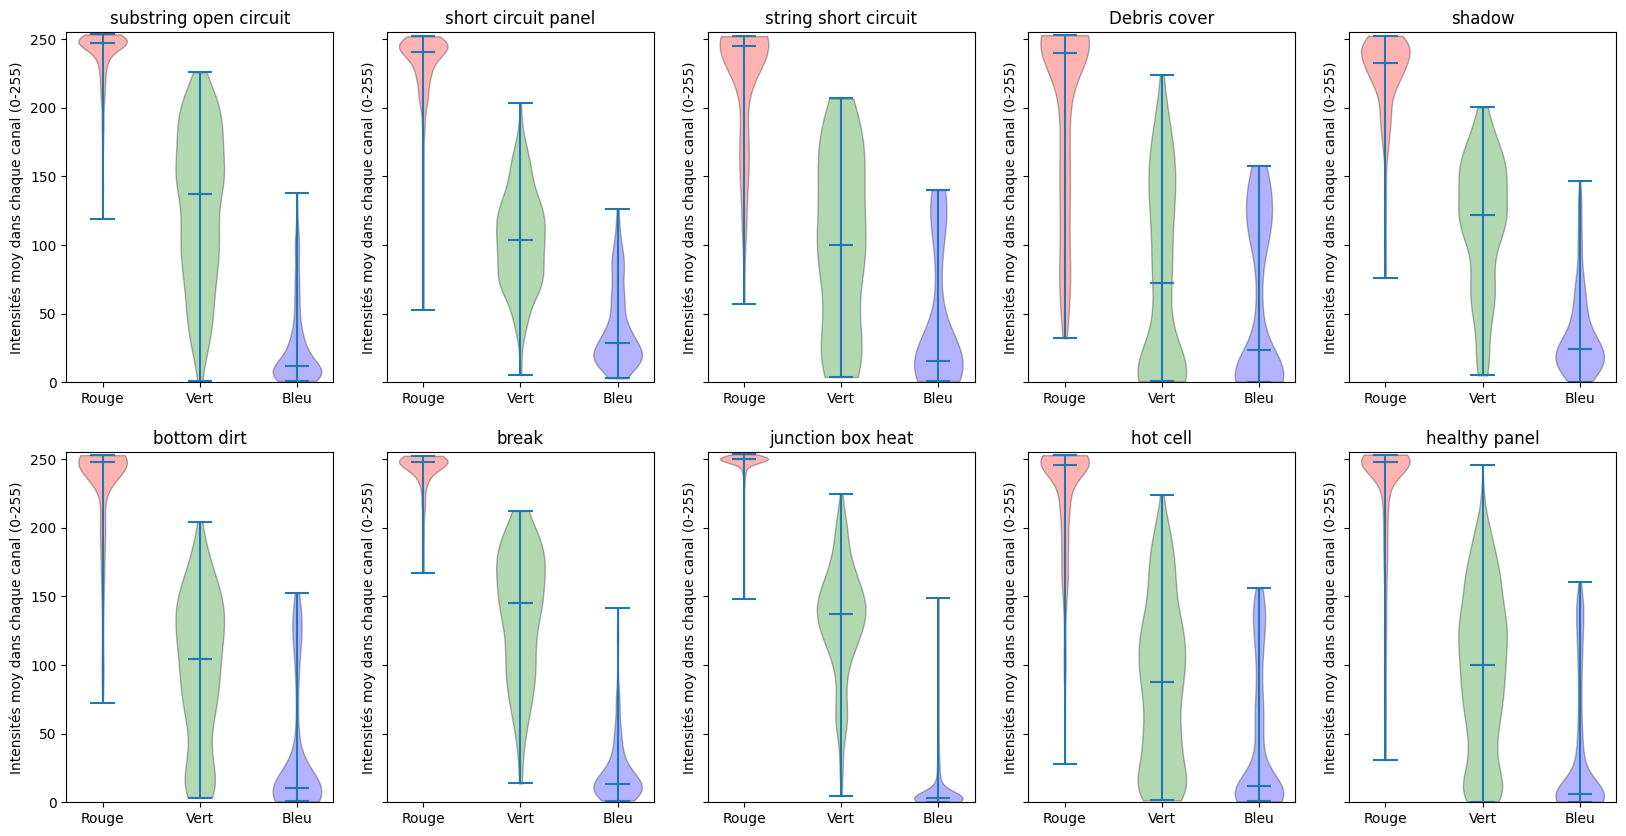

In [92]:
# Initialisation de la figure
fig,axes = plt.subplots(2,5,sharey=True,figsize=(20,10))

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    mean_colors = []
    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        mean_colors.append(np.mean(img, axis=(0,1)))  # Moyenne par canal
    # Couleurs personnalisées
    colors = ["red","green","blue"]
    # Création du violinplot
    parts = axes[i//5,i%5].violinplot(np.array(mean_colors),showmedians=True)
    axes[i//5,i%5].set_ylim([0,255])
    axes[i//5,i%5].set_title(classe)
    axes[i//5,i%5].set_xticks([1, 2, 3])
    axes[i//5,i%5].set_xticklabels(["Rouge","Vert","Bleu"])
    axes[i//5,i%5].set_ylabel("Intensités moy dans chaque canal (0-255)")
    # Changer la couleur de chaque violon
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')

plt.show()

Les images ont une **composante rouge très forte**, et une composante bleue faible, quel que soit le type de défaut observé.

C'est normal : les images thermiques infra-rouges sont en **fausses couleurs** (ou pseudo-couleurs) qui représentent en fait une température. L'utilisation d'une palette de couleurs adaptée permet d'améliorer la perception des variations de température.


#### Conclusion sur l'analyse des couleurs


Pour la suite de l'analyse, nous allons donc **travailler sur le format 110x60 et convertir ces images en niveaux de gris** : les pixels clairs représenteront les températures élevées et les pixels sombres les températures basses des panneaux.

### 6. Analyse des images : les niveaux de gris

Prenons une image aléatoire de chaque classe, convertissons-la en niveaux de gris et traçons un **histogramme de ces niveaux de gris**.

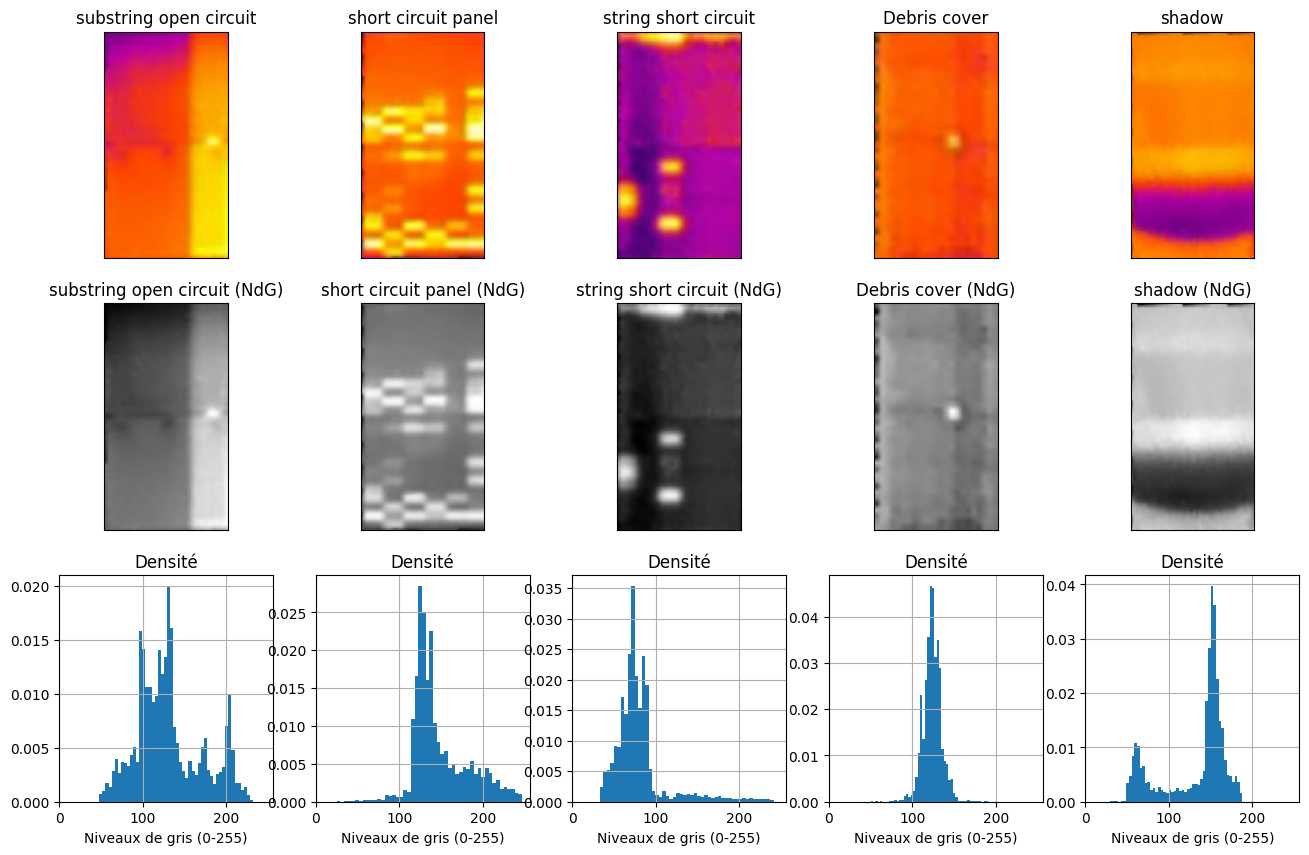

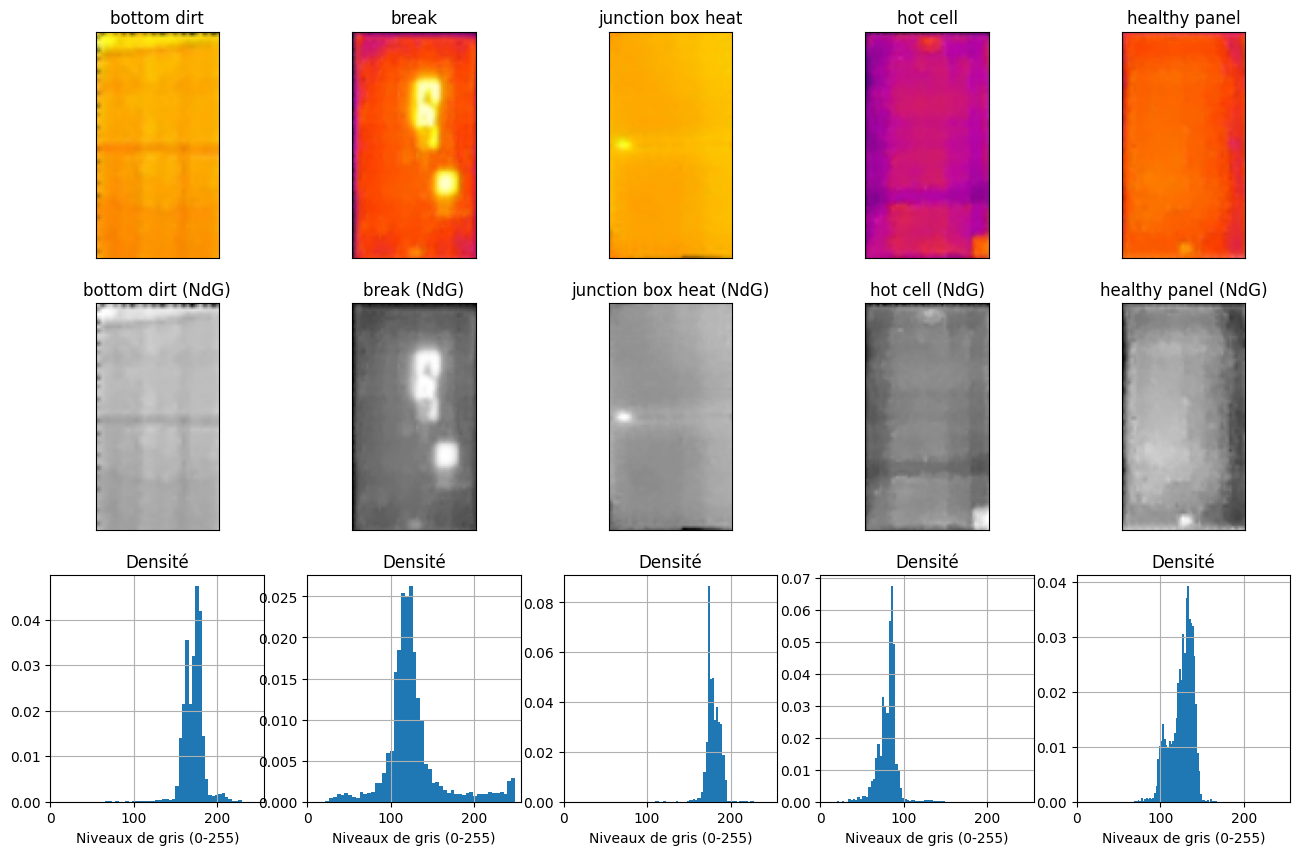

In [93]:
# On subdivise en 2 pour ne pas surcharger la visualisation
for i in range(2):
    # Initialisation de la figure
    plt.figure(figsize=(16,10))
    num_plot=1
    # Pour chaque classe
    for classe in df_110x60['Classe'].unique()[i*5:(i+1)*5]:
        classe_sample = df_110x60.loc[(df_110x60["Classe"]==classe)].sample(1).iloc[0] # Récupération d'une ligne au hasard pour cette classe  
        img = cv2.imread(classe_sample["Chemin"]) # Récupération de l'image en couleur
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion BGR => RGB
        plt.subplot(3,5,num_plot) # Positionnement sur le subplot
        plt.imshow(img_rgb) # Affichage de l'image
        plt.title(classe) # Titre  = classe
        plt.xticks([])
        plt.yticks([])
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        plt.subplot(3,5,num_plot+5) # Positionnement sur le subplot au-dessous
        plt.imshow(img_gray,cmap='gray') # Affichage de l'image
        plt.title(f"{classe} (NdG)") # Titre  = classe
        plt.xticks([])
        plt.yticks([])
        plt.subplot(3,5,num_plot+10) # Positionnement sur le subplot au-dessous
        plt.hist(img_gray.flatten(), bins=50, density=True) # Affichage de l'histogramme
        plt.title("Densité")
        plt.xlabel("Niveaux de gris (0-255)")
        plt.xlim([0, 256])
        plt.grid()
        num_plot += 1
    plt.show()

Sur l'échantillon observé on constate une distribution des niveaux de gris différents suivant le type de défaut. Vérifions si on peut généraliser ce constat en traçant l'**histogramme global** de chaque classe.

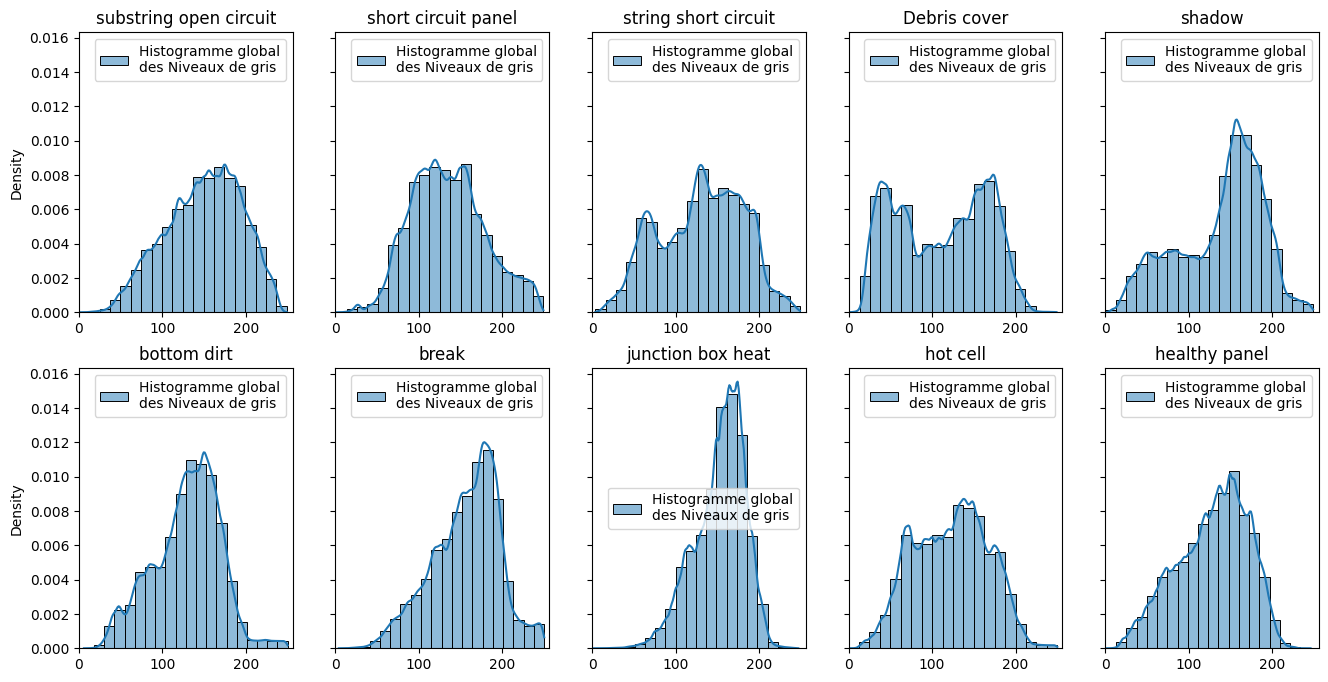

In [94]:
# Initialisation de la figure
fig,axes = plt.subplots(2,5,sharey=True,figsize=(16,8))

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    # Initialisation des listes de stockage des pixels
    all_pixels = []
    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        all_pixels.extend(img_gray.ravel()) # On "aplatit" l'image et on ajoute les pixels à la liste
    # Affichage de l'histogramme des niveaux de gris par classe
    sns.histplot(all_pixels, bins=20, stat="density",kde=True,ax=axes[i//5,i%5],label="Histogramme global\ndes Niveaux de gris")
    axes[i//5,i%5].set_title(classe)
    axes[i//5,i%5].set_xlim([0, 256])
    axes[i//5,i%5].legend()

plt.show()

Ici on peut constater que **la distribution des niveaux de gris présente des différences en fonction du type de défauts considéré**.

Ces différences devraient pouvoir être utilisées par un modèle de machine learning pour séparer les modules, et retrouver la classe cible de chacun.

Calculons maintenant des **indicateurs statistiques sur les niveaux de gris pour chaque classe**.

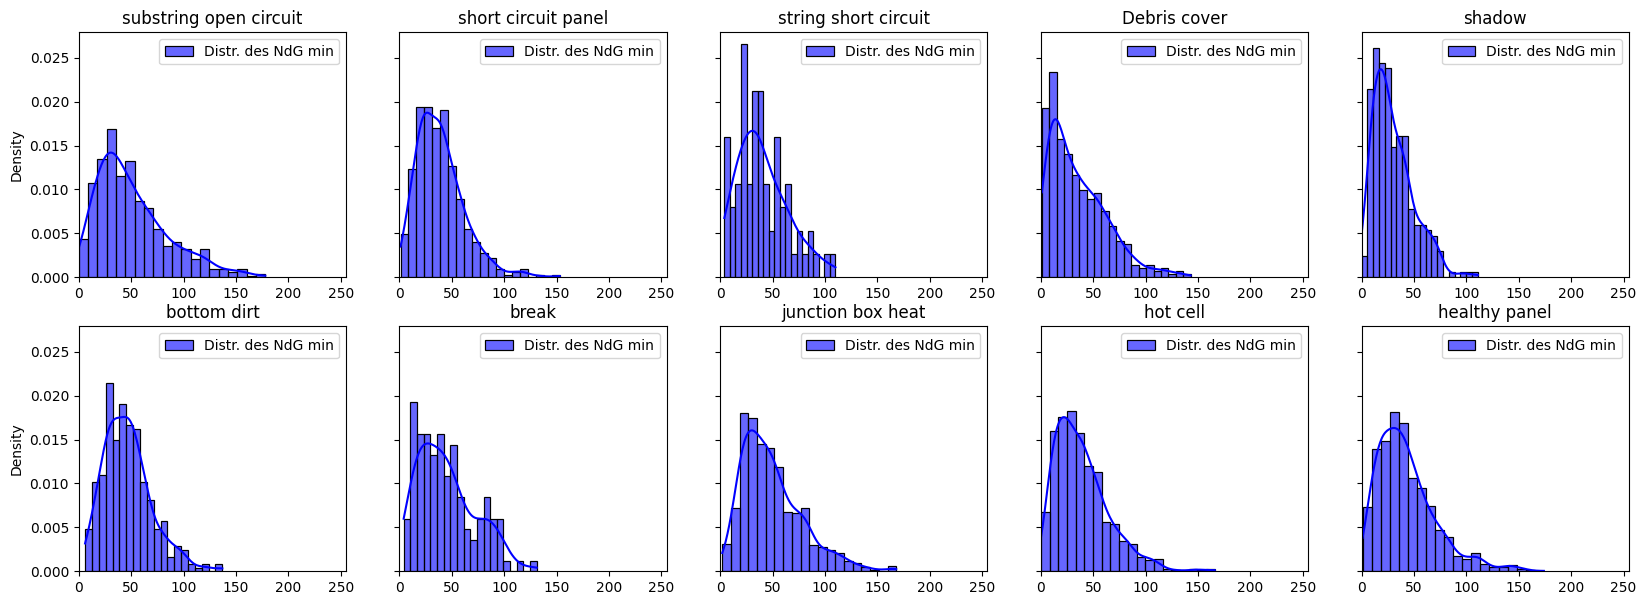

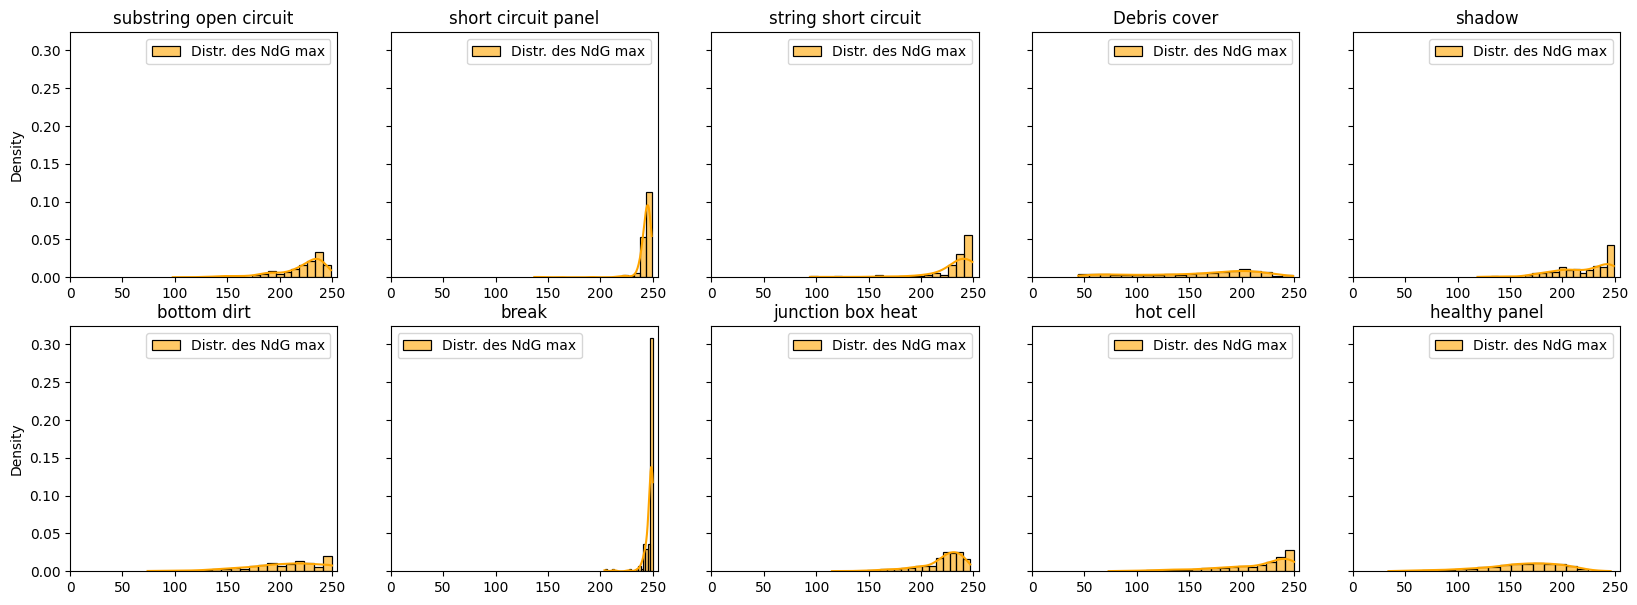

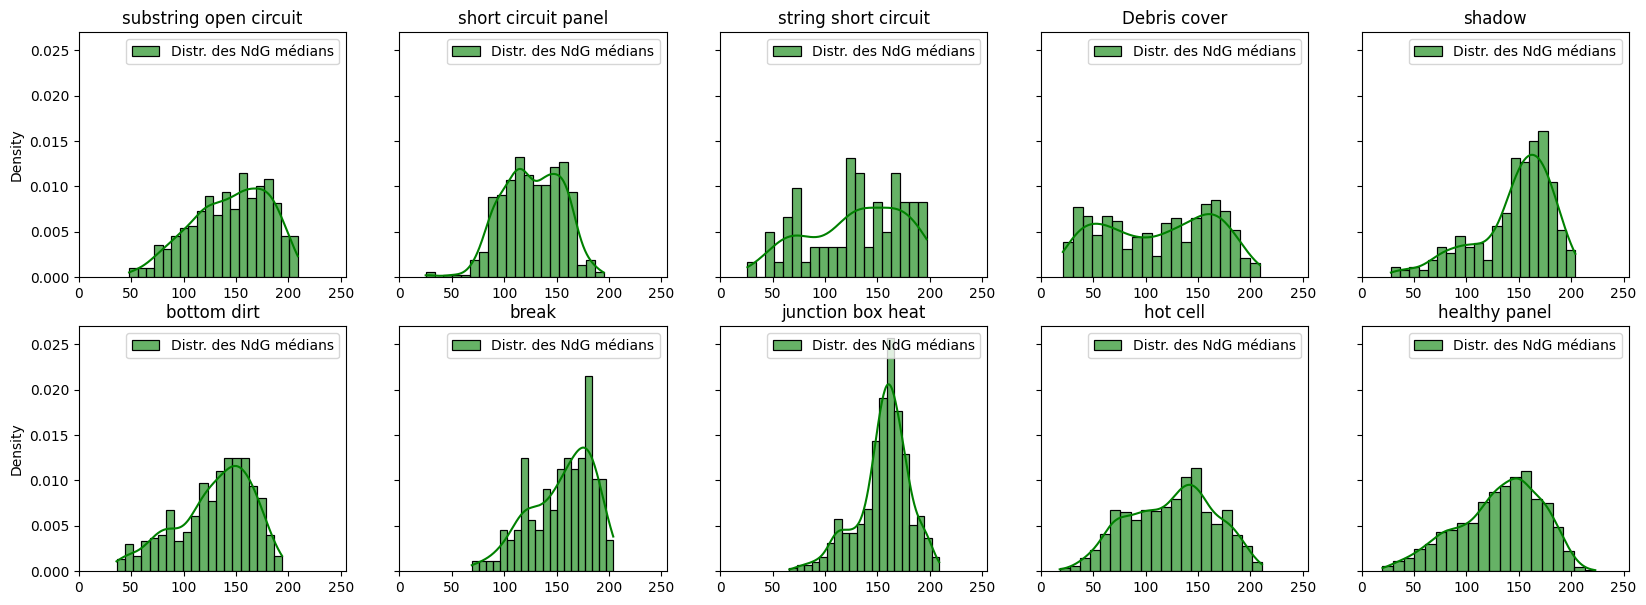

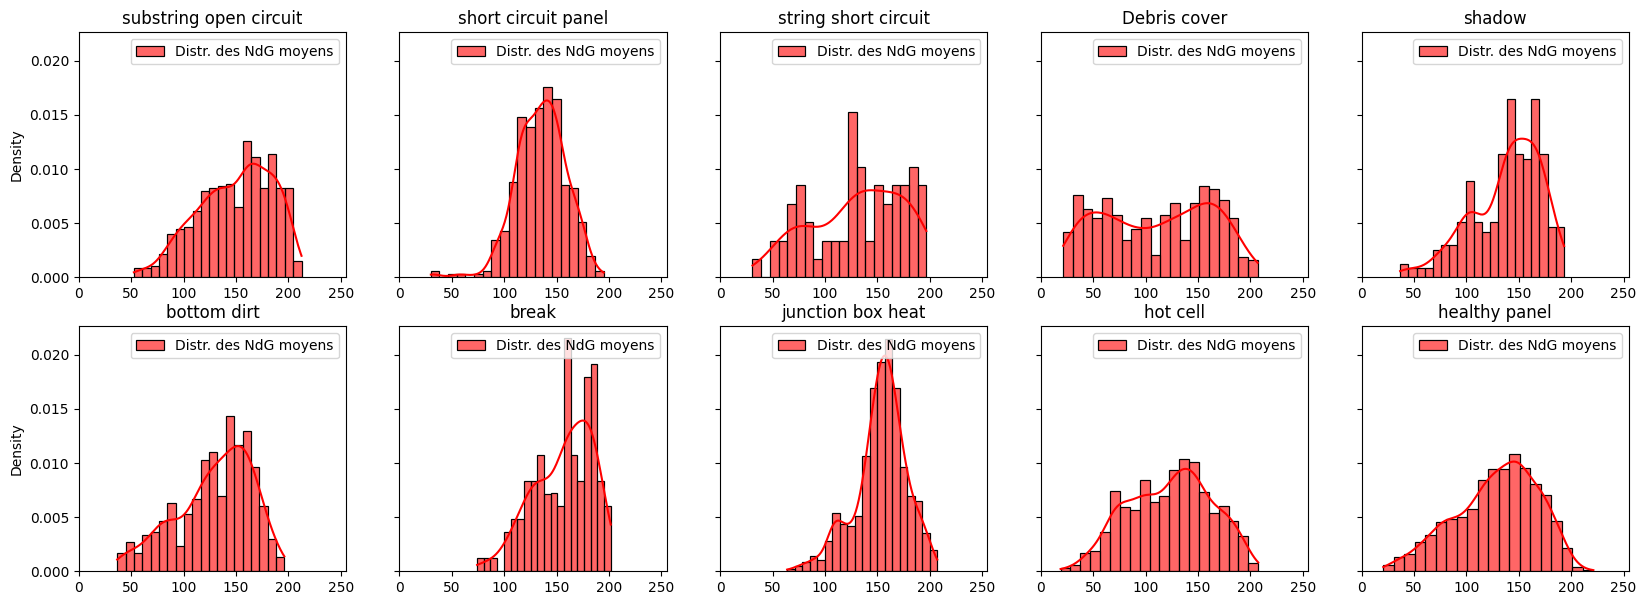

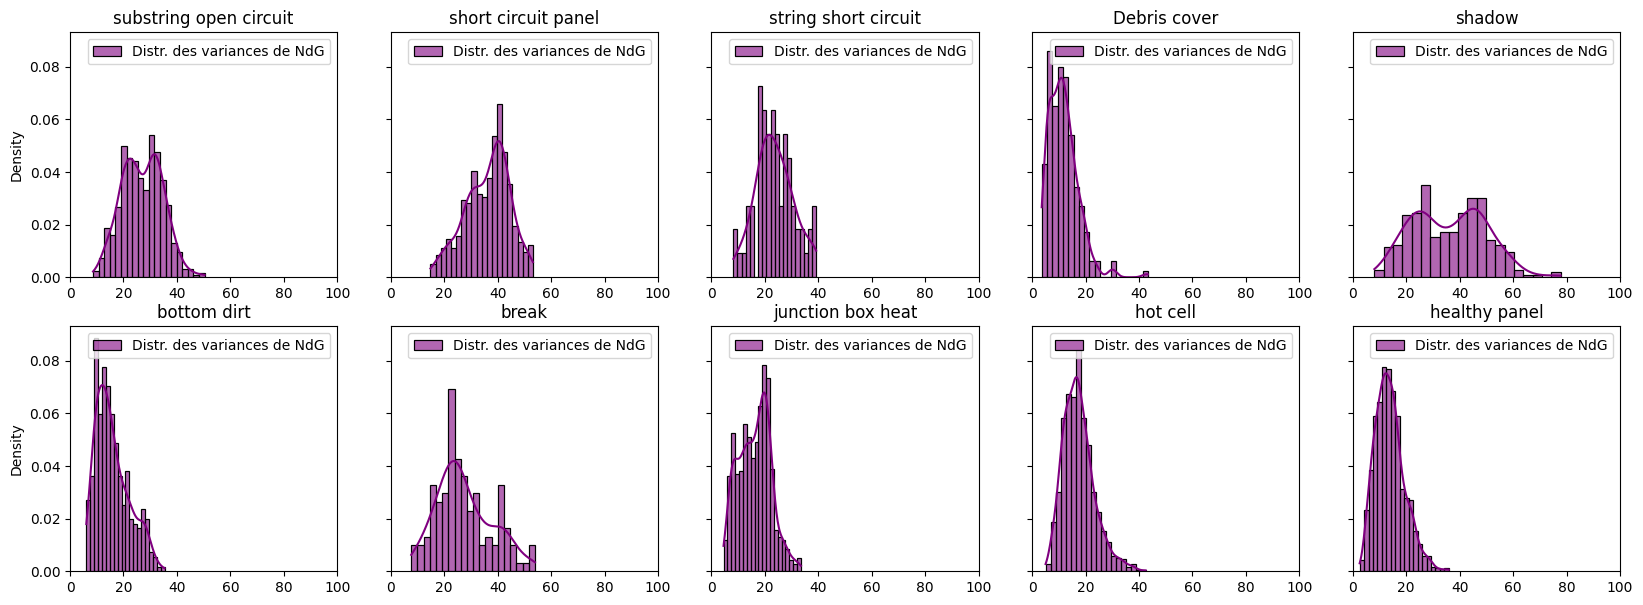

In [95]:
# Dictionnaire des indicateurs statistiques pour chaque classe
intensites_min = {}
intensites_max = {}
intensites_median = {}
intensites_moy = {}
intensites_std = {}

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    intensites_min[classe] = []
    intensites_max[classe] = []
    intensites_median[classe] = []
    intensites_moy[classe] = []
    intensites_std[classe] = []
    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        # Calcul et stockage des indicateurs statistiques
        intensites_min[classe].append(np.min(img_gray))
        intensites_max[classe].append(np.max(img_gray))
        intensites_median[classe].append(np.median(img_gray))
        intensites_moy[classe].append(np.mean(img_gray))
        intensites_std[classe].append(np.std(img_gray))

# Liste des indicateurs statistiques, leurs légendes et couleurs
indicateurs = [intensites_min,intensites_max,intensites_median,intensites_moy,intensites_std]
legendes = ["NdG min","NdG max","NdG médians","NdG moyens","variances de NdG"]
couleurs = ["blue","orange","green","red","purple"]

# Pour chaque indicateur statistique
for indicateur,legende,couleur in zip(indicateurs,legendes,couleurs):
    fig,axes = plt.subplots(2,5,sharey=True,figsize=(20,7))
    # Pour chaque classe
    for i,classe in enumerate(indicateur):
        # Afficher l'histogramme et la densité de probabilité de l'indicateur pour cette classe
        sns.histplot(indicateur[classe],bins=20,stat="density",kde=True,ax=axes[i//5,i%5],label=f"Distr. des {legende}",color=couleur,alpha=0.6)
        axes[i//5,i%5].set_title(classe) # Titre = classe
        axes[i//5,i%5].legend()
        if indicateur == intensites_std:
            axes[i//5,i%5].set_xlim([0,100]) # On limite l'abscisse max à 100 pour les variances
        else:
            axes[i//5,i%5].set_xlim([0,255])
    plt.show()



A l'oeil, il est **difficile de détecter des tendances vraiment significatives sur les indicateurs statistiques, à part les éléments suivants** :
- les populations *short circuit panel* et surtout *break* semblent avoir des intensités **max** plus élevées. Un défaut de ce type pourrait entraîner une augmentation locale de température plus élevée.
- la population *shadow* semble avoir des intensités **min** plus faibles. Il paraît logique que les panneaux ayant une zone ombragée puissent descendre à des températures plus basses.
- les distributions des intensités **moyennes et médianes** semblent assez proches l'un de l'autre. La forme de la distribution semble différente selon le type de défaut.
- concernant la **variance** des intensités, elle semble également différente selon le type de défaut : les variances pour les *panneaux sains* et les défauts de type *hot cell*, *junction box heat*, *bottom dirt* et *debris cover* semblent un peu plus basses, indiquant des écarts de température moindres ou plus localisés, ce qui semble cohérent pour ces classes.

Effectuons un **test statistique** sur ces indicateurs pour vérifier s'ils présentent une différence significative selon les classes. Comme toutes les distributions ne sont pas normales, nous n'allons pas utiliser ANOVA mais un **test de Kruskal-Wallis**. Si le résultat est significatif nous ferons un **test Dunn-Bonferroni** pour vérifier quelles classes sont réellement distinguables l'une de l'autre.

Test Kruskal-Wallis sur les NdG min
Statistique F : 230.17448578427735
P-Value : 1.5117819261245417e-44
Il existe une différence significative entre les classes.

Test Kruskal-Wallis sur les NdG max
Statistique F : 2702.222646661179
P-Value : 0.0
Il existe une différence significative entre les classes.

Test Kruskal-Wallis sur les NdG médians
Statistique F : 534.9543214158413
P-Value : 1.8694032195633555e-109
Il existe une différence significative entre les classes.

Test Kruskal-Wallis sur les NdG moyens
Statistique F : 543.3253891293518
P-Value : 3.0023563471541315e-111
Il existe une différence significative entre les classes.

Test Kruskal-Wallis sur les variances de NdG
Statistique F : 2625.908747385489
P-Value : 0.0
Il existe une différence significative entre les classes.



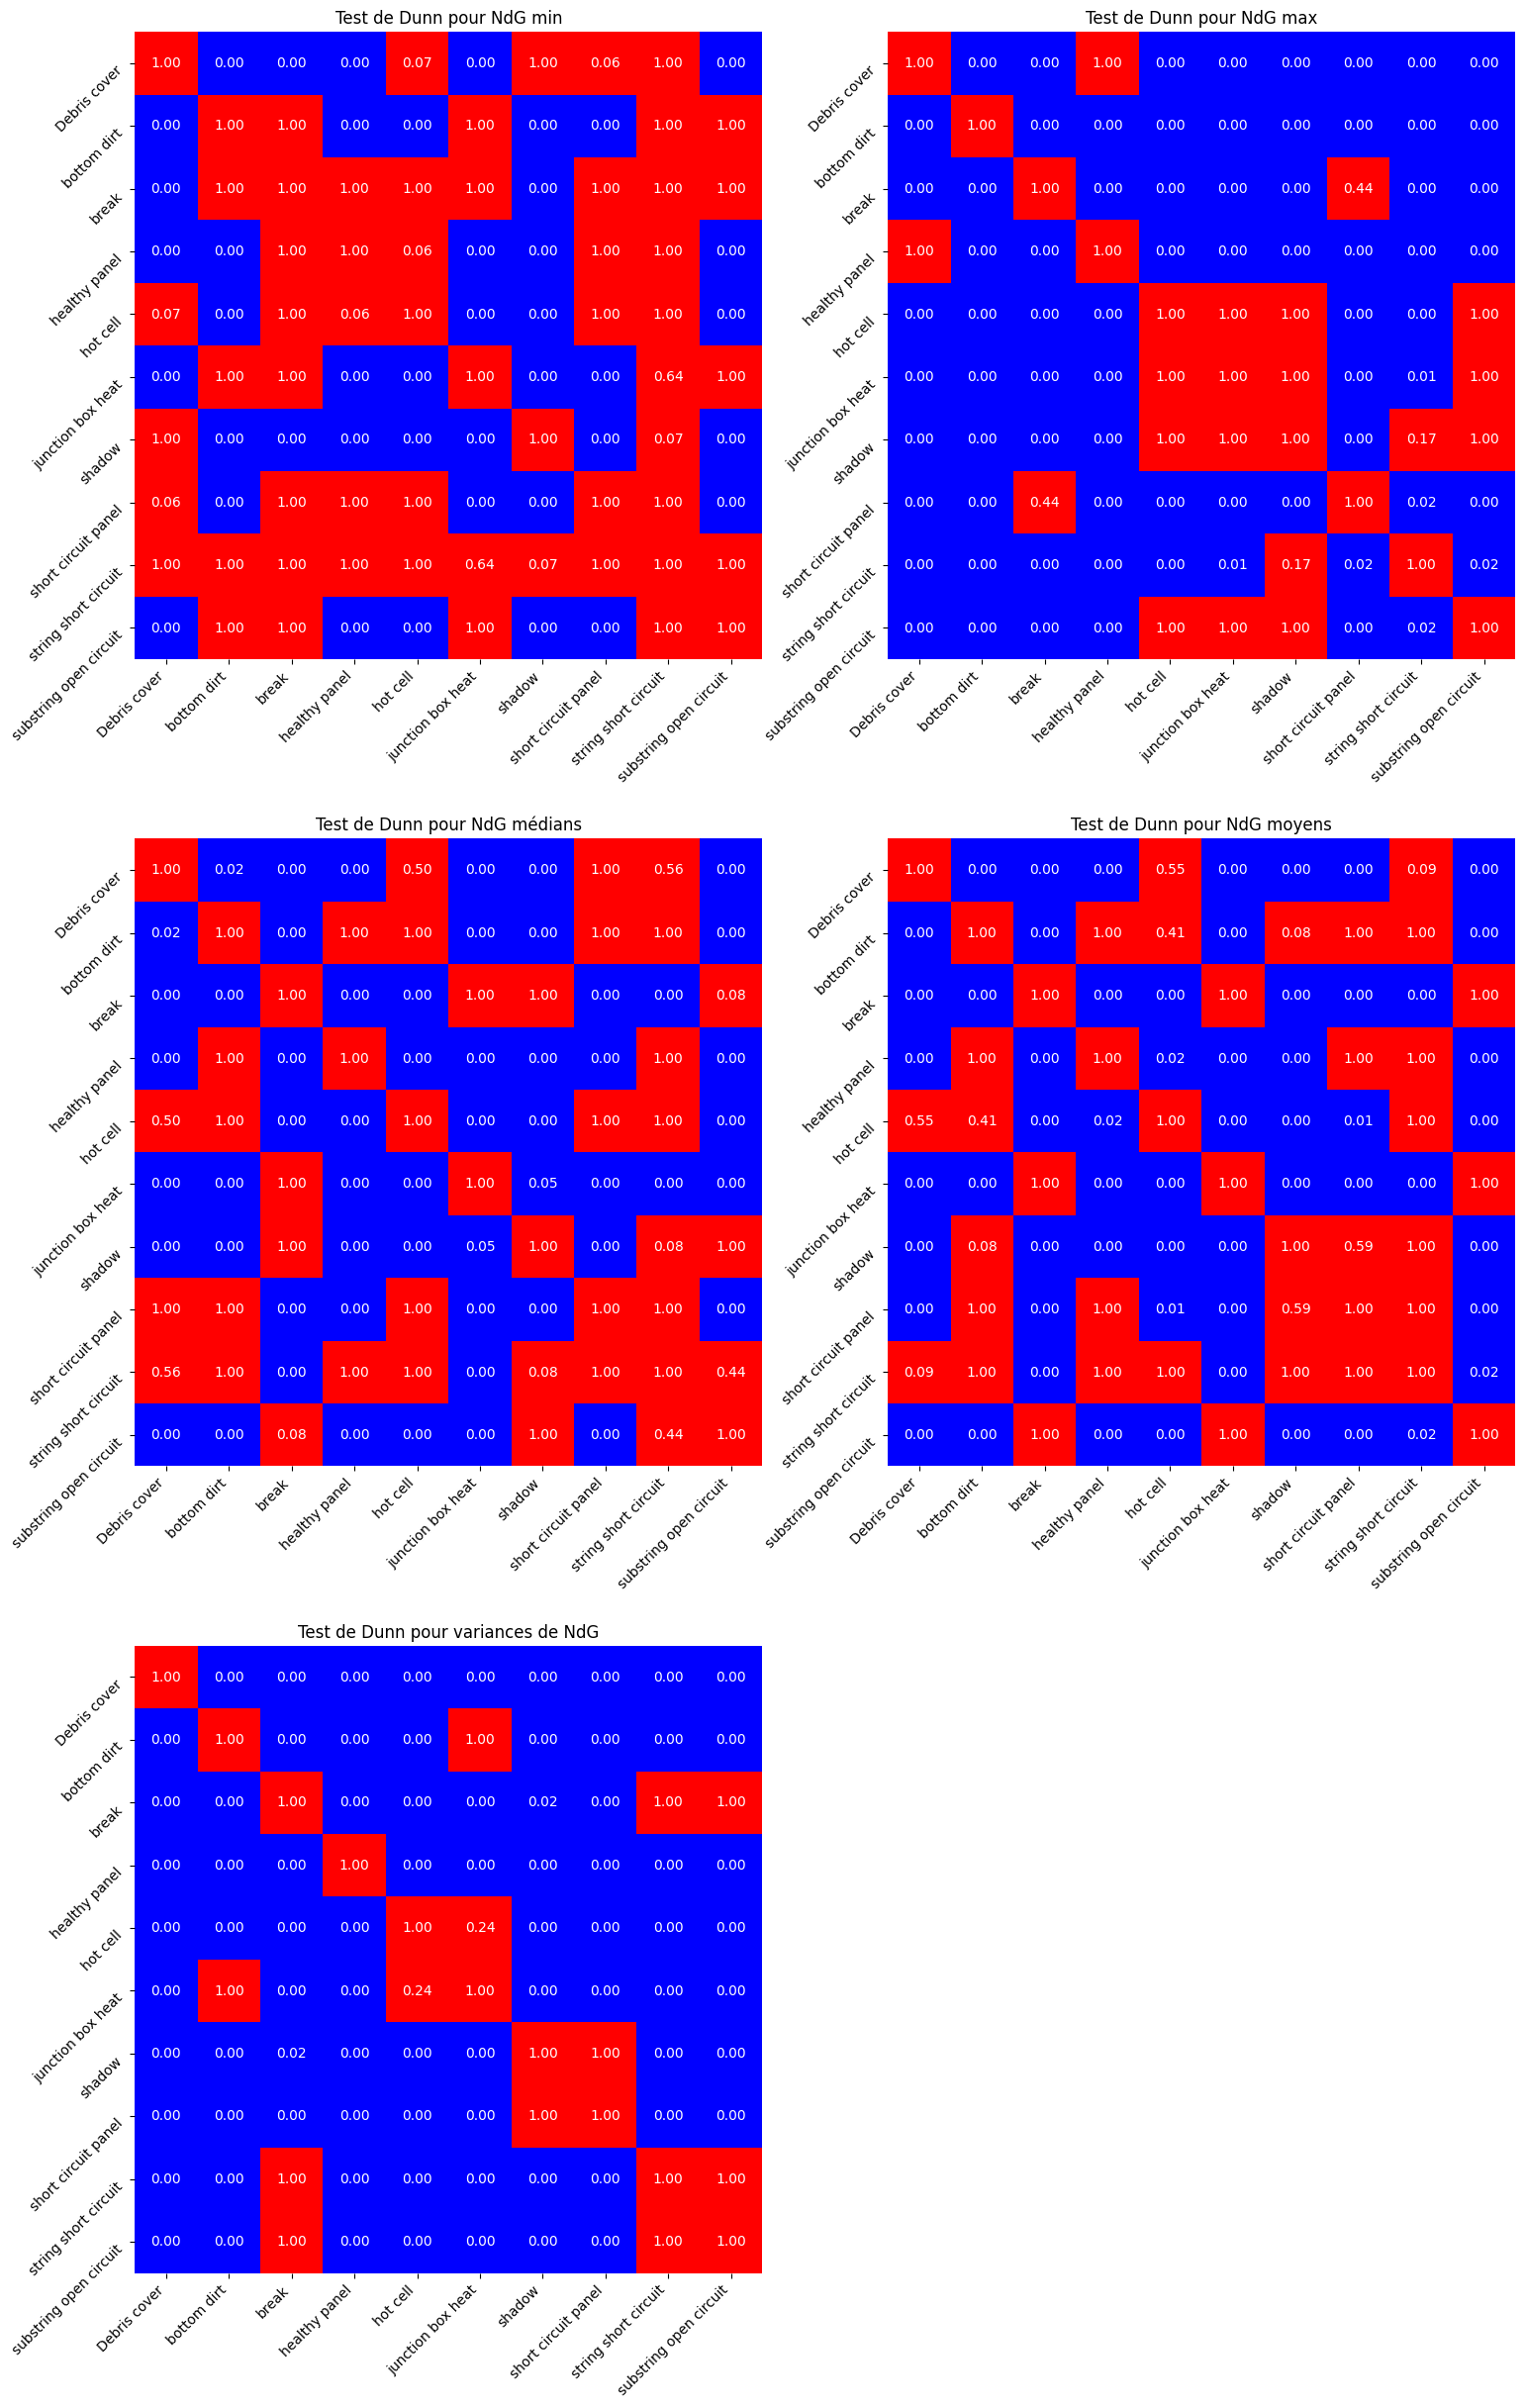

In [96]:
import scipy.stats as stats
import scikit_posthocs as sp

fig, axes = plt.subplots(3, 2,figsize=(18, 30))
fig.delaxes(axes[2, 1])

# Pour chaque indicateur statistique
for i,(indicateur,legende) in enumerate(zip(indicateurs,legendes)):

    # On va faire un test Kruskal-Wallis
    print ("Test Kruskal-Wallis sur les",legende)

    # Effectuer le test Kruskal-Wallis
    f_stat, p_value = stats.kruskal(*list(indicateur.values()))

    # Afficher les résultats
    print(f"Statistique F : {f_stat}")
    print(f"P-Value : {p_value}")

    # Conversion du dictionnaire en DataFrame pour le test de Dunn
    data = []
    for classe, valeurs in indicateur.items():
        for val in valeurs:
            data.append({"Classe": classe, legende: val})
    df_dunn = pd.DataFrame(data)

    # Interprétation des résultats
    alpha = 0.05
    if p_value < alpha:
        print("Il existe une différence significative entre les classes.\n")
        # Test de Dunn
        dunn_results = sp.posthoc_dunn(df_dunn, val_col=legende, group_col="Classe", p_adjust="bonferroni")
        # Visualisation des comparaisons
        # On binarise les couleurs d'affichage par rapport au seuil de p-value
        binary_data = (dunn_results >= alpha).astype(int)
        cmap = sns.color_palette(["blue", "red"])
        sns.heatmap(binary_data, annot=dunn_results, cmap=cmap, fmt=".2f",square=True,cbar=False,ax=axes[i//2,i%2])
        axes[i//2,i%2].set_title(f"Test de Dunn pour {legende}")
        axes[i//2,i%2].set_xticklabels(axes[i//2,i%2].get_xticklabels(),rotation=45,ha="right")
        axes[i//2,i%2].set_yticklabels(axes[i//2,i%2].get_yticklabels(),rotation=45,va="top")
    else:
        print("Aucune différence significative détectée entre les classes.\n")
plt.show()

D'après le test de Kruskal-Wallis, **pour chacun des 5 indicateurs de niveaux de gris, il y a bien une différence selon la classe de défauts**. Le test post-hoc de Dunn nous permet d'identifier les paires de classes qui sont significativement différentes selon l'indicateur : elles apparaissent en bleu sur le schéma (valeur < 0.05). Par exemple :
- *shadow* et *substring open circuit* selon l'indicateur NdG min
- *healthy panel* et *break* selon l'indicateur NdG max
- *debris cover* et *junction box heat* selon l'indicateur NdG médian
- *hot cell* et *break* selon l'indicateur NdG moyen
- *bottom dirt* et *short circuit panel* selon l'indicateur variance de NdG

On peut remarquer, avec le test de Dunn, que les indicateurs max et variance sont globalement meilleurs pour différencier une classe d'une autre

#### Conclusion sur l'analyse des niveaux de gris

En observant les histogrammes des niveaux de gris pour chaque classe et en analysant leurs indicateurs statistiques, nous avons noté des spécificités selon les types de défauts.

Le fait qu'il n'est pas évident, pour un humain, de détecter des tendances, ne signifie pas que ces indicateurs sont inutilisables. Les tests statistiques et les modèles de machine learning sont justement là pour nous aider à identifier les relations entre features et variable cible, alors même qu'elles n'apparaissent pas de façon évidente.

### 7. Analyse des images : les textures

*Pour rappel, nous poursuivons l'analyse sur les images 110x60 en niveaux de gris. Celles-ci contiennent l'information thermique d'un panneau et sont donc plus aptes à dégager des informations pertinentes sur les classes de défauts*

Nous allons analyser plusieurs indicateurs afin d'étudier les textures pour chaque type de défauts.

Commençons par afficher, pour une image de chaque classe:
- la **carte d'entropie** => étude de la complexité locale
- le **filtre de Canny** => étude des contours


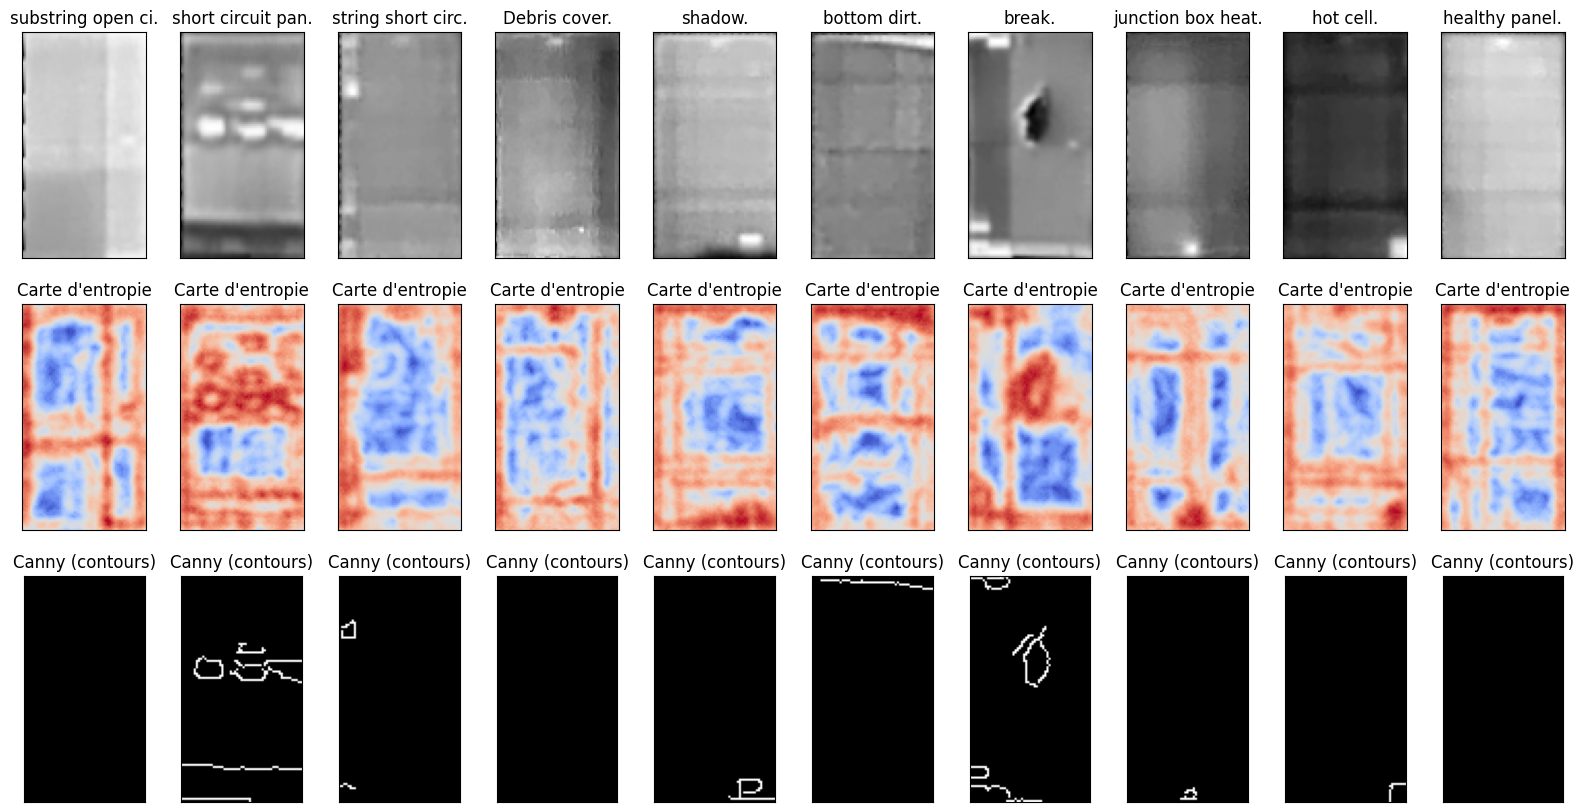

In [97]:
from skimage.filters.rank import entropy
from skimage.morphology import disk


# Initialisation de la figure
plt.figure(figsize=(20,10))
num_plot=1
# Pour chaque classe
for classe in df_110x60['Classe'].unique():
    classe_sample = df_110x60.loc[(df_110x60["Classe"]==classe)].sample(1).iloc[0] # Récupération d'une ligne au hasard pour cette classe  
    img = cv2.imread(classe_sample["Chemin"]) # Récupération de l'image en couleur
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
    plt.subplot(3,10,num_plot) # Positionnement sur le subplot au-dessous
    plt.imshow(img_gray,cmap='gray') # Affichage de l'image
    plt.title(f"{classe[:17]}.") # Titre  = classe
    plt.xticks([])
    plt.yticks([])
    # Carte d'entropie de l'image
    entropy_img = entropy(img_gray, disk(4))
    plt.subplot(3,10,num_plot+10) # Positionnement sur le subplot au-dessous
    plt.imshow(entropy_img, cmap="coolwarm") # Affichage de la carte d'entropie
    plt.title("Carte d'entropie")
    plt.xticks([])
    plt.yticks([])
    # Filtre de Canny pour détecter les contours
    canny_img = cv2.Canny(img_gray[2:109,2:59], 100, 200) # on enlève les bords pour ne pas les détecter...
    plt.subplot(3,10,num_plot+20) # Positionnement sur le subplot au-dessous
    plt.imshow(canny_img, cmap="gray") # Affichage des contours
    plt.title("Canny (contours)")
    plt.xticks([])
    plt.yticks([])
    num_plot +=1
plt.show()

Sur cet échantillon, la carte d'entropie semble indiquer une **complexité variable** suivant la classe (rouge foncé = complexité élevée). Par exemple, les défauts de type *short circuit panel* ont visiblement une complexité spatiale plus riche que *junction box heat*.

Par ailleurs, le filtre de Canny semble indiquer une **présence de contours variable** suivant la classe. Par exemple, les défauts de type *break* ont visiblement plus de contours que les panneaux sains.

Vérifions cela avec des tests statistiques.

Commençons par étudier **l'entropie** pour chaque classe : **affichons la moyenne** des entropies par classe et effectuons un **test statistique de Kruskal-Wallis**

Statistique F : 2625.908747385489
P-Value : 0.0
Il existe une différence significative entre les classes.



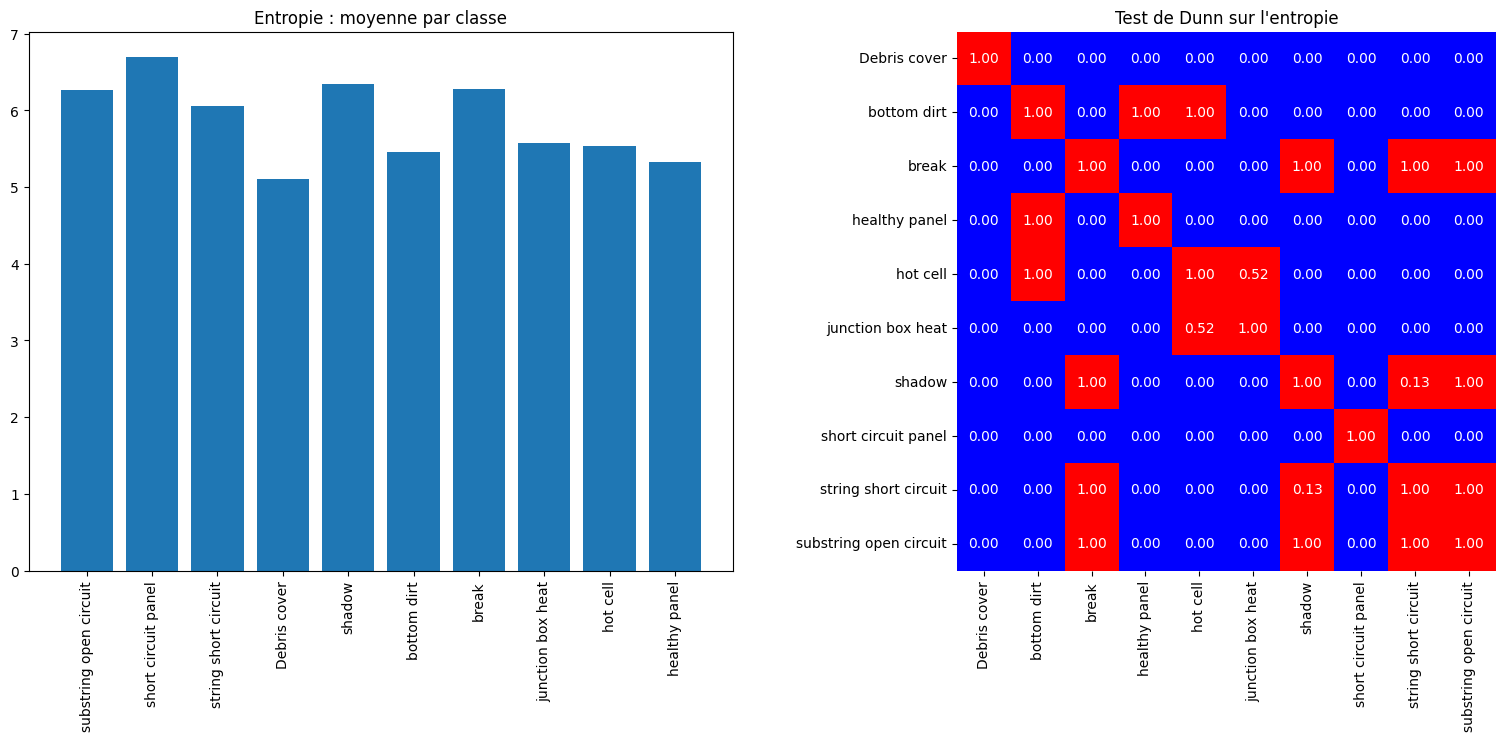

In [98]:
from skimage.measure import shannon_entropy

# Dictionnaire des entropies pour chaque classe
entropies = {}

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    entropies[classe] = []
    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        # Calcul et stockage de l'entropie
        entropies[classe].append(shannon_entropy(img_gray))

# Afficher le graphe des entropies moyennes par classe
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(entropies.keys(),height=[np.mean(entropies[classe]) for classe in entropies])
plt.title (f"Entropie : moyenne par classe")
plt.xticks(rotation=90)

# Test Kruskal
stats.kruskal(*entropies.values()) 
# Afficher les résultats
print(f"Statistique F : {f_stat}")
print(f"P-Value : {p_value}")

# Conversion du dictionnaire en DataFrame pour le test de Dunn
data = []
for classe, valeurs in entropies.items():
    for val in valeurs:
        data.append({"Classe": classe, "Entropie": val})
df_dunn = pd.DataFrame(data)

alpha = 0.05
if p_value < alpha:
    print("Il existe une différence significative entre les classes.\n")
    # Test de Dunn
    dunn_results = sp.posthoc_dunn(df_dunn, val_col="Entropie", group_col="Classe", p_adjust="bonferroni")
    # Visualisation des comparaisons
    plt.subplot(1,2,2)
    # On binarise les couleurs d'affichage par rapport au seuil de p-value
    binary_data = (dunn_results >= alpha).astype(int)
    cmap = sns.color_palette(["blue", "red"])
    sns.heatmap(binary_data, annot=dunn_results, cmap=cmap, fmt=".2f",square=True,cbar=False)
    plt.title ("Test de Dunn sur l'entropie")
else:
    print("Aucune différence significative détectée entre les classes.\n")

plt.show()

On constate que **l'entropie est différente suivant la classe**. Certains défauts comme *short circuit panel* ont une entropie plutôt élevée, indiquant une complexité globale plus importante, pour d'autres comme *debris cover* c'est l'inverse. Le test de Dunn nous confirme que ce critère permet de différencier plusieurs classes l'une de l'autre (valeurs < 0.05).


Concernant les contours détectés avec le filtre de Canny, étudions la **densité des contours** pour chaque classe : **affichons la moyenne** des densités par classe et effectuons un **test statistique de Kruskal-Wallis**

Statistique F : 2625.908747385489
P-Value : 0.0
Il existe une différence significative entre les classes.



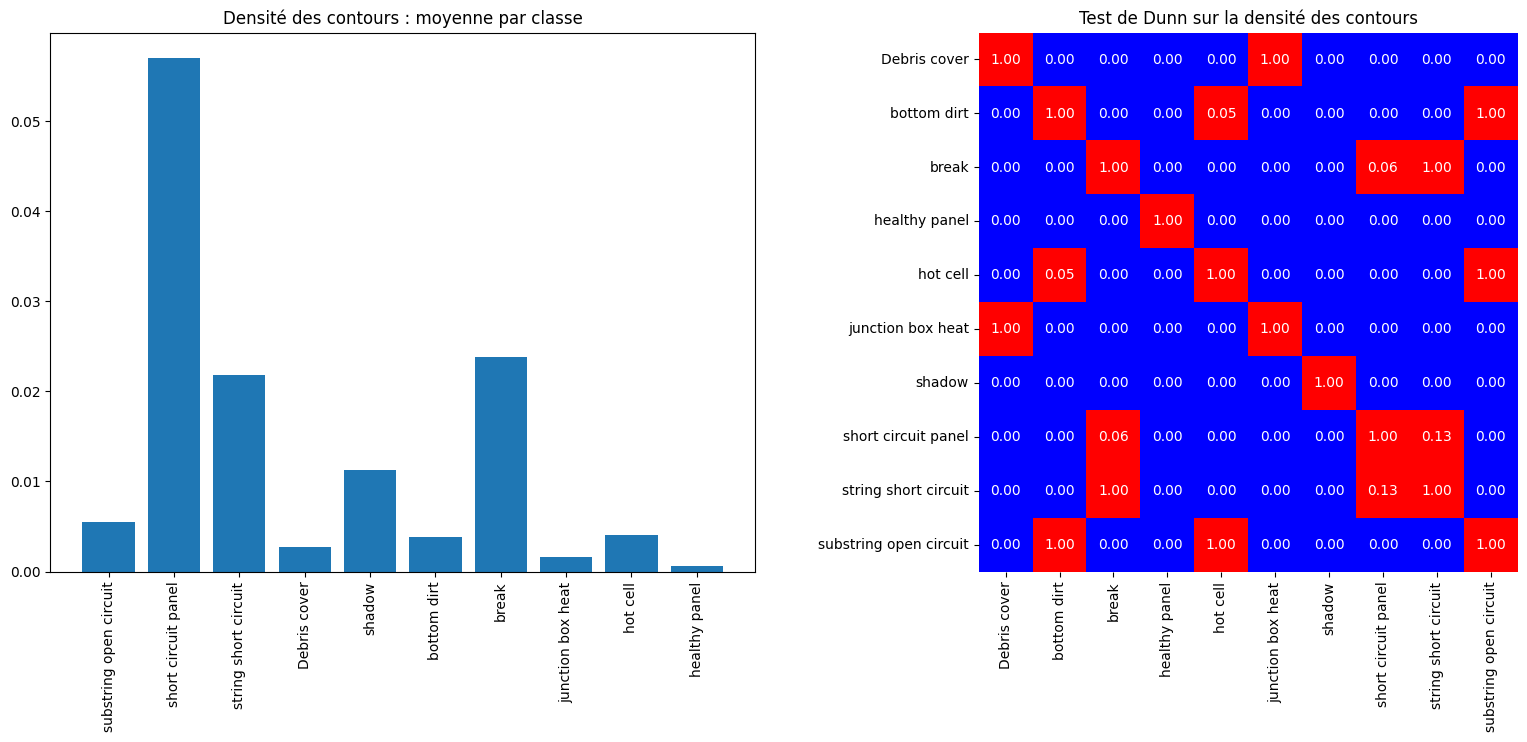

In [99]:
# Fonction de calcul de la densité de contours d'une image
def edge_density(img):
    edges = cv2.Canny(img, 100, 200)
    return np.sum(edges > 0) / edges.size

# Dictionnaire des densités pour chaque classe
edge_densities = {}

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    edge_densities[classe] = []
    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        # Calcul et stockage de la densité de contours
        edge_densities[classe].append(edge_density(img_gray[2:109,2:59]))

# Afficher le graphe des densités moyennes par classe
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(edge_densities.keys(),height=[np.mean(edge_densities[classe]) for classe in edge_densities])
plt.title ("Densité des contours : moyenne par classe")
plt.xticks(rotation=90)

# Test Kruskal
stats.kruskal(*edge_densities.values()) 
# Afficher les résultats
print(f"Statistique F : {f_stat}")
print(f"P-Value : {p_value}")

# Conversion du dictionnaire en DataFrame pour le test de Dunn
data = []
for classe, valeurs in edge_densities.items():
    for val in valeurs:
        data.append({"Classe": classe, "Edge": val})
df_dunn = pd.DataFrame(data)

alpha = 0.05
if p_value < alpha:
    print("Il existe une différence significative entre les classes.\n")
    # Test de Dunn
    dunn_results = sp.posthoc_dunn(df_dunn, val_col="Edge", group_col="Classe", p_adjust="bonferroni")
    # Visualisation des comparaisons
    plt.subplot(1,2,2)
    # On binarise les couleurs d'affichage par rapport au seuil de p-value
    binary_data = (dunn_results >= alpha).astype(int)
    cmap = sns.color_palette(["blue", "red"])
    sns.heatmap(binary_data, annot=dunn_results, cmap=cmap, fmt=".2f",square=True,cbar=False)
    plt.title ("Test de Dunn sur la densité des contours")
else:
    print("Aucune différence significative détectée entre les classes.\n")

plt.show()


On constate que **la densité des contours est différente suivant la classe**. Certains défauts comme *short circuit panel*, *string short circuit* ou *break* ont par exemple plus de contours en moyenne. Le test de Dunn nous confirme que c'est un bon critère pour différencier de nombreuses classes entre elles (valeurs < 0.05).

Calculons maintenant la **matrice GLCM** de chaque image (Gray Level Co-occurrence Matrix) qui nous permet d'étudier la texture en regardant comment les pixels sont liés à leurs voisins en terme de niveaux de gris. Nous extrayons de cette matrice 4 caractéristiques : 
- **contraste** : variation d'intensité dans l'image. Contraste élevé <=> texture hétérogène
- **homogénéité** : mesure la régularité. Homogénéité élévée <=> transitions douces
- **énergie** : répétition des motis. Energie élevé <=> motifs réguliers, non chaotiques
- **corrélation** : dépendance entre pixels voisins. Corrélation élevée <=> structure continue

Test Kruskal-Wallis sur Contraste
Statistique F : 1651.0121554700272
P-Value : 0.0
Il existe une différence significative entre les classes.



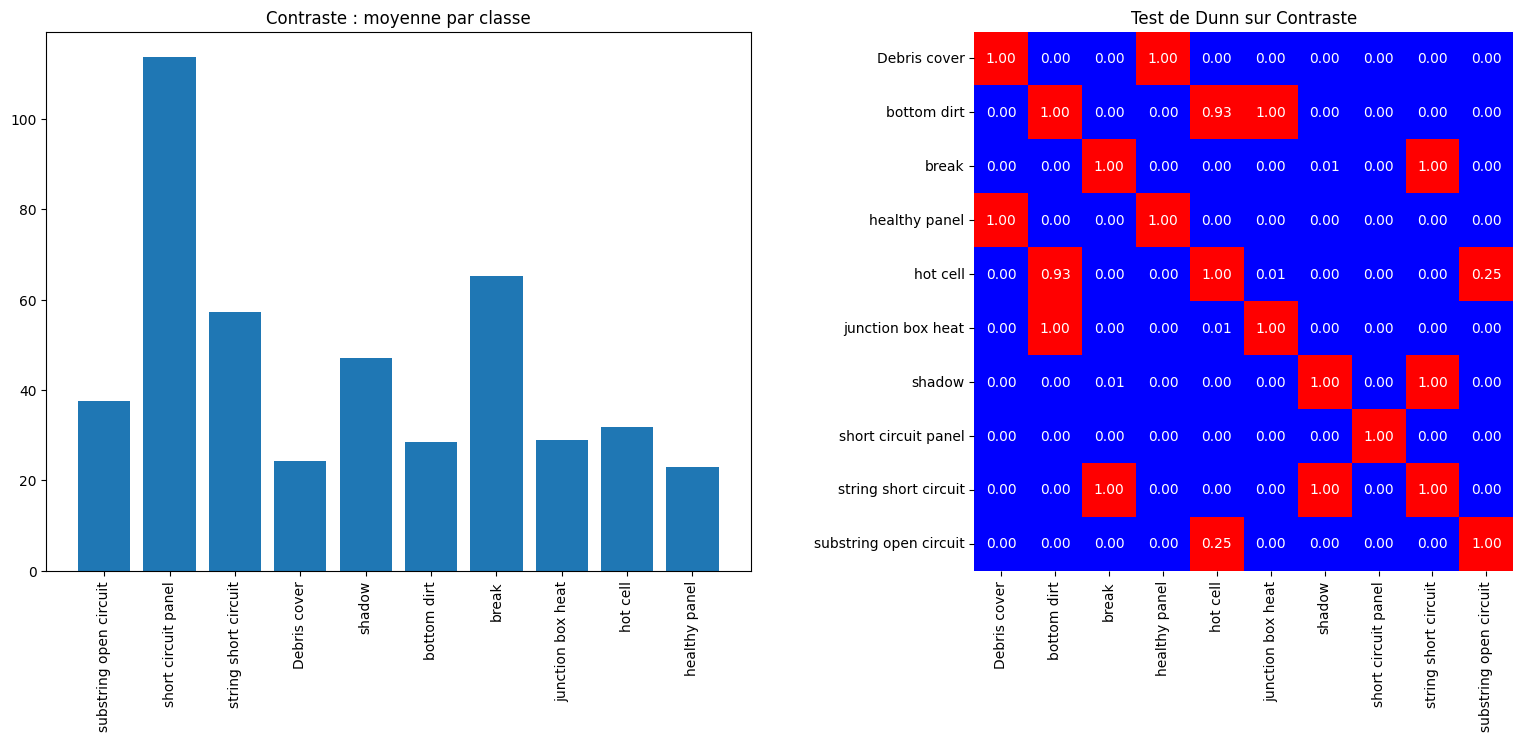

Test Kruskal-Wallis sur Homogénéite
Statistique F : 1745.998377678996
P-Value : 0.0
Il existe une différence significative entre les classes.



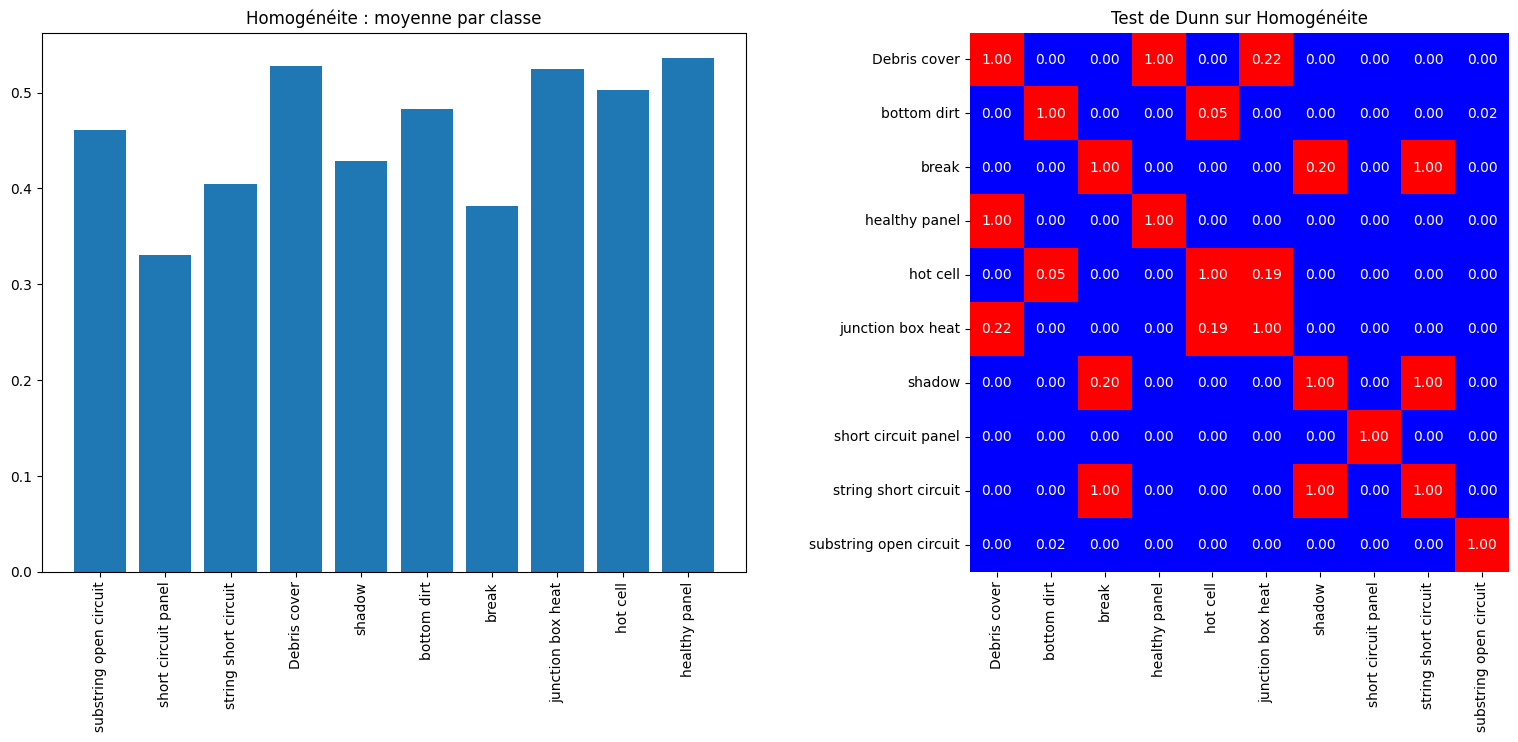

Test Kruskal-Wallis sur Energie
Statistique F : 1544.9154695092548
P-Value : 0.0
Il existe une différence significative entre les classes.



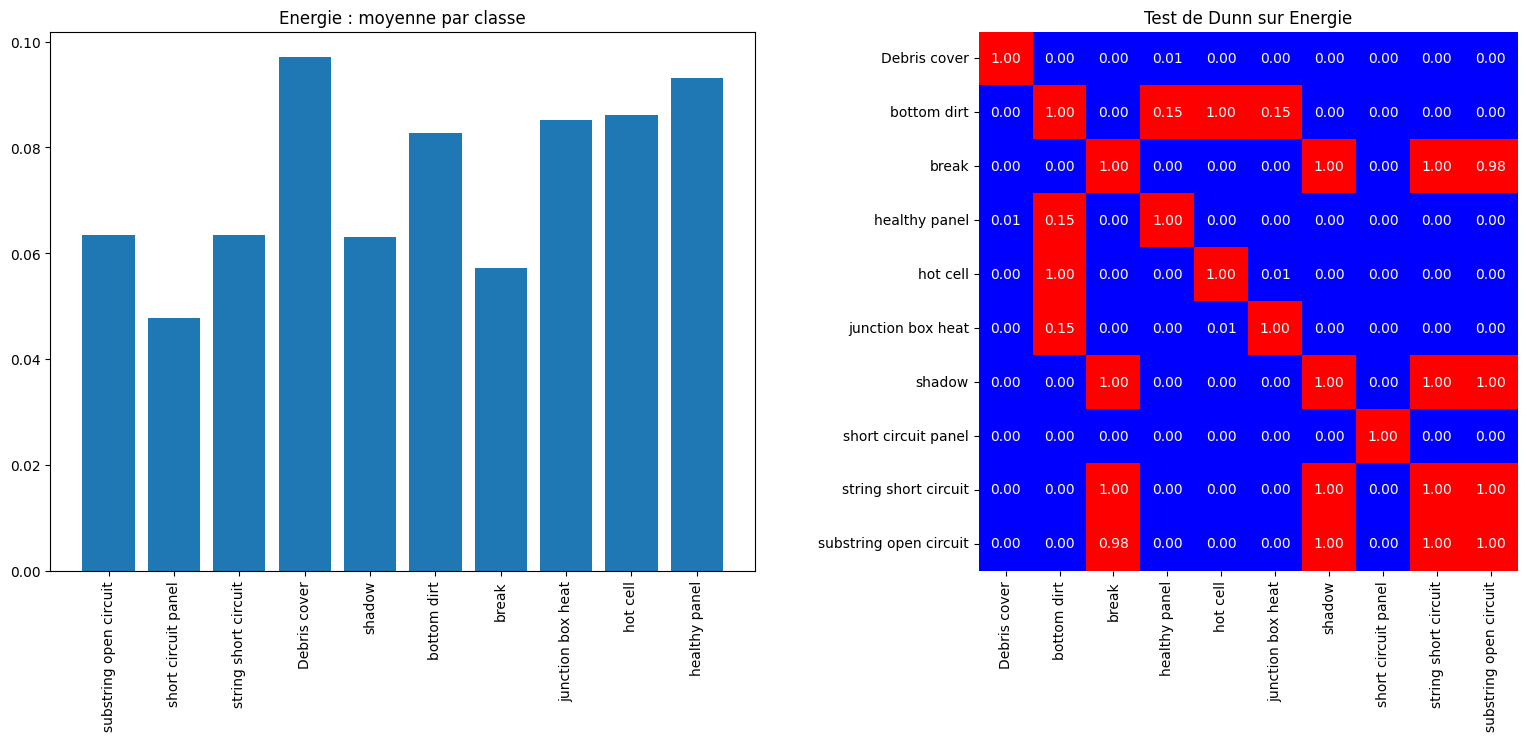

Test Kruskal-Wallis sur Corrélation
Statistique F : 897.8624725682603
P-Value : 1.7865615741063063e-187
Il existe une différence significative entre les classes.



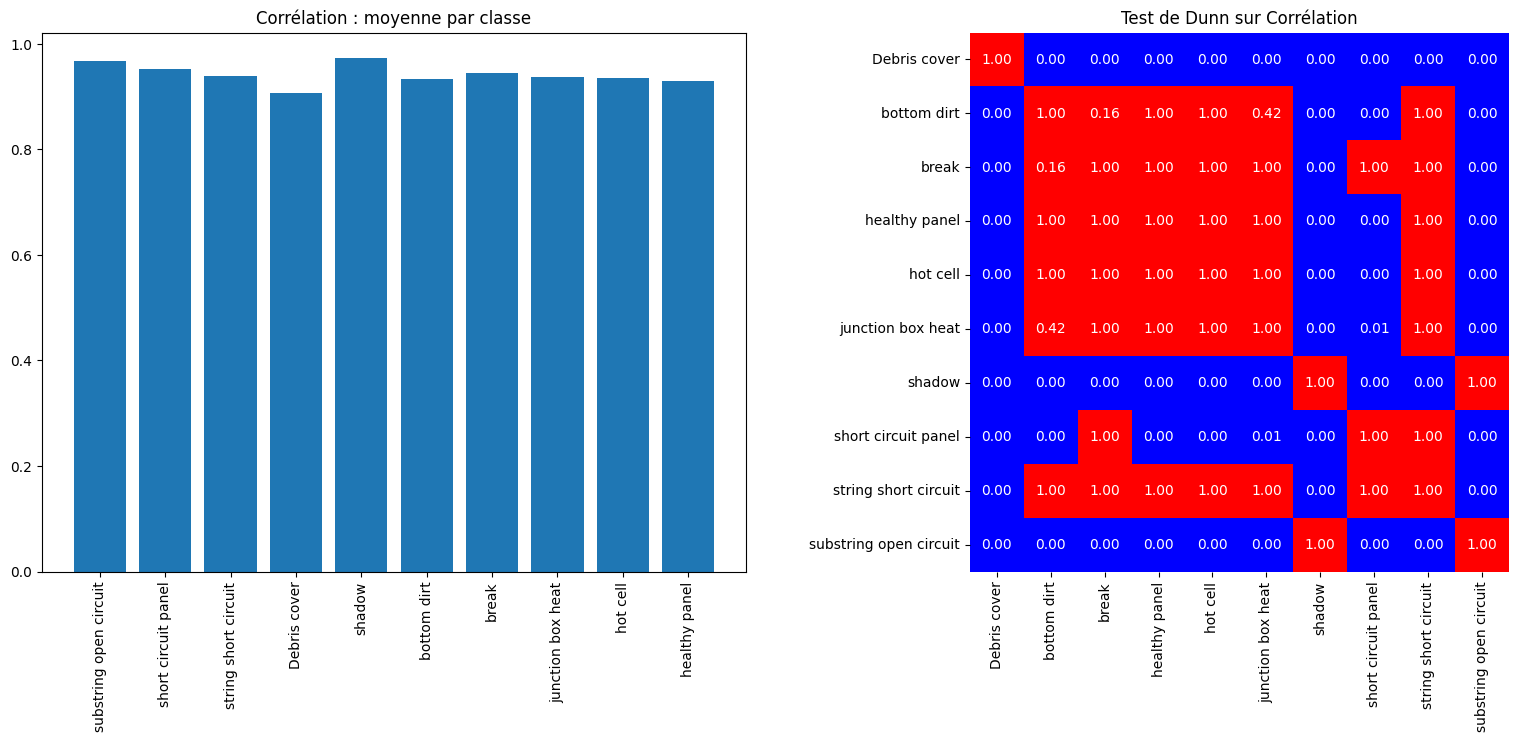

In [100]:
from skimage.feature import graycomatrix, graycoprops

# Dictionnaire des propriétés pour chaque classe
contrastes = {}
homogeneites = {}
energies = {}
correlations = {}

# Pour chaque classe
for i,classe in enumerate(df_110x60['Classe'].unique()):
    contrastes[classe] = []
    homogeneites[classe] = []
    energies[classe] = []
    correlations[classe] = []

    # Pour chaque image de la classe
    for chemin in df_110x60.loc[(df_110x60["Classe"]==classe)]["Chemin"]:
        img = cv2.imread(chemin) # Récupération de l'image en couleur
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Conversion BGR => NdG
        # Calcul de la matrice GLCM (directions: 0°, 45°, 90°, 135°)
        glcm = graycomatrix(img_gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
        # Extraction et stockage des propriétés
        contrastes[classe].append(graycoprops(glcm, 'contrast').mean())
        homogeneites[classe].append(graycoprops(glcm, 'homogeneity').mean())
        energies[classe].append(graycoprops(glcm, 'energy').mean())
        correlations[classe].append(graycoprops(glcm, 'correlation').mean())

proprietes = [contrastes,homogeneites,energies,correlations]
legendes = ["Contraste","Homogénéite","Energie","Corrélation"]

# Pour chaque propriété
for i,(propriete,legende) in enumerate(zip(proprietes,legendes)):

    # Afficher le graphe des moyennes des propriétés par classe
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    plt.bar(propriete.keys(),height=[np.mean(propriete[classe]) for classe in propriete])
    plt.title (f"{legende} : moyenne par classe")
    plt.xticks(rotation=90)

    # On va faire un test Kruskal-Wallis
    print (f"Test Kruskal-Wallis sur {legende}")

    # Effectuer le test Kruskal-Wallis
    f_stat, p_value = stats.kruskal(*list(propriete.values()))
    print(f"Statistique F : {f_stat}")
    print(f"P-Value : {p_value}")

    # Conversion du dictionnaire en DataFrame pour le test de Dunn
    data = []
    for classe, valeurs in propriete.items():
        for val in valeurs:
            data.append({"Classe": classe, legende: val})
    df_dunn = pd.DataFrame(data)

    alpha = 0.05
    if p_value < alpha:
        print("Il existe une différence significative entre les classes.\n")
        # Test de Dunn
        dunn_results = sp.posthoc_dunn(df_dunn, val_col=legende, group_col="Classe", p_adjust="bonferroni")
        # Visualisation des comparaisons
        plt.subplot(1,2,2)
        # On binarise les couleurs d'affichage par rapport au seuil de p-value
        binary_data = (dunn_results >= alpha).astype(int)
        cmap = sns.color_palette(["blue", "red"])
        sns.heatmap(binary_data, annot=dunn_results, cmap=cmap, fmt=".2f",square=True,cbar=False)
        plt.title (f"Test de Dunn sur {legende}")
    else:
        print("Aucune différence significative détectée entre les classes.\n")
    plt.show()

Les tests statistiques sur les propriétés extraites des matrices GLCM nous confirment un **lien entre texture de l'image et type de défauts**. Quelques points-clés :
- Pour le **contraste** : il est plus élevé pour les catégories *short circuit panel*, *string short circuit*, *shadow* et *break*. Ces types de défaut sont susceptibles d'entraîner de plus fortes variations de température. D'après le test de Dunn, le contraste permet de différencier un bon nombre de classes entre elles.
- Pour l'**homogénéité** : c'est un peu l'opposé du contraste. D'après le test de Dunn, cette propriété nous permet, en gros, de différencier les même classes que pour le constraste.
- Pour l'**énergie** : les 5 classes *Debris cover*, *bottom dirt*, *junction box heat*, *hot cell* et *healthy panel* se détachent des autres. C'est assez logique, car les 4 défauts en question ont des impacts de température plus localisés, donc ces classes présentent une structure moins "chaotique". 
- Pour la **corrélation** : cette propriété est moins pertinente. En effet les niveaux de gris représentant une température, il y a en général une forte continuité entre les pixels adjacents pour tous les types de défauts.

#### Conclusion sur l'analyse des textures

Nous pouvons conclure à un lien statistique entre le type de défauts et la texture de l'image. Des propriétés comme la densité des contours ou le contraste permettent de différencier plusieurs classes entre elles.

Ces spécificités peuvent être exploitées par des modèles de machines learning, en leur fournissant en entrée des vecteurs caractéristiques de la structure spatiale.

### 8. Conclusion générale sur l'exploration

Le dataset PVF-10 comporte plus de 5500 images infra-rouges de panneaux photovoltaïques prises par drone :
- disponibles dans 3 formats (original, 110x60 et 112x112)
- classées selon 10 catégories : les panneaux sains et 9 catégories de défauts.

Afin de faciliter son exploitation, nous avons **créé un dataframe "structure_pvf_10.csv"** qui consolide ses caractéristiques structurelles.

Après exploration, il s'avère que le dataset est conforme à sa description. Nous avons toutefois procédé à quelques tâches de **nettoyage** : 
- renommage des 3 formats et des 10 classes pour plus de lisibilité
- suppression de 7 doublons dans chaque format
- annotation de 4% des images qui représentent des panneaux carrés. 

L'**analyse** des niveaux de gris et des textures nous indique des spécificités selon les défauts observés. Ce dataset présente donc un potentiel intéressant pour l'apprentissage supervisé, d'autant que les 10 classes sont plutôt équilibrées. Nous prêterons toutefois une attention particulière aux classes *break* et *string short circuit* qui sont les moins représentées.

**Nous explorerons plusieurs pistes pour modéliser la classification des défauts :**
- approche Machine Learning "classique" sur des indicateurs statistiques basés sur les niveaux de gris du format 110x60 (équivalents à une matrice de température). Nous utiliserons les indicateurs de cette analyse, mais d'autres également, comme les percentiles.
- approche Machine Learning "classique" sur les images après extraction de vecteurs caractéristiques, basés sur GLCM comme dans cette analyse, ou d'autres types (par exemple : Histogram of Oriented Gradients)
- approche Deep Learning sur les images


In [101]:
# Chemin du répertoire de destination
target_path = "../data/processed"

# Export du dataframe
csvfile_path = os.path.join(target_path, 'structure_pvf_10.csv')
df_pvf10.to_csv(csvfile_path, index=False)
display(df_pvf10)

Chemin  Format Train_Test  \
0      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
1      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
2      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
3      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
4      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
...                                                  ...     ...        ...   
16732  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16733  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16734  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16735  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16736  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   

                       Classe                               Nom  Type  \
0      substring open circuit  DJI_20230228122654_0466_T_000001  .png   
1      substring open circuit  DJI_20230228122803_0500_T_000001  .png   
2      substring open circuit  DJI_20230228123425_0666_T_000002  .png   
3      substring open circuit  DJI_20230228124402_0129_T_000002  .png   
4      substring open circuit  DJI_20230228124624_0220_T_000001  .png   
...                       ...                               ...   ...   
16732           healthy panel  DJI_20231121165445_0658_T_000004  .tif   
16733           healthy panel  DJI_20231121165536_0682_T_000002  .tif   
16734           healthy panel  DJI_20231121165610_0698_T_000002  .tif   
16735           healthy panel  DJI_20231121165943_0012_T_000003  .tif   
16736           healthy panel  DJI_20231121170238_0094_T_000002  .tif   

       Largeur  Hauteur  Canaux  Doute_Carre  
0           60      110       3        False  
1           60      110       3        False  
2           60      110       3        False  
3           60      110       3        False  
4           60      110       3        False  
...        ...      ...     ...          ...  
16732       69      109       3        False  
16733       65      110       3        False  
16734       63      109       3        False  
16735       70      116       3        False  
16736       68      108       3        False  

[16716 rows x 10 columns]